## Importar librerias

In [1]:
import pandas as pd
import numpy as np
import pyreadstat
import os
from pathlib import Path
import warnings
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

warnings.filterwarnings('ignore')

print("Librerías importadas exitosamente")

Librerías importadas exitosamente


## Carga de datos

In [2]:
# 1) Cargar y concatenar todos los archivos .sav de la carpeta 'data/violencia-intrafamiliar'
base_path = Path('../data/violencia-intrafamiliar')
sav_files = sorted(list(base_path.glob('*.sav')))
print(f'Archivos encontrados: {len(sav_files)}')
dfs = []
metadatas = {}
for p in sav_files:
   try:
      df, meta = pyreadstat.read_sav(p)
      year = p.stem.split('-')[0] if '-' in p.stem else p.stem
      df = df.copy()
      df['__source_year'] = year
      dfs.append(df)
      metadatas[year] = meta
      print(f'Leido: {p.name} -> shape {df.shape}')
   except Exception as e:
      print(f'Error leyendo {p}: {e}')

if dfs:
   data = pd.concat(dfs, ignore_index=True, sort=False)
   print('Concatenación completa. Shape total:', data.shape)
else:
   data = pd.DataFrame()
   print('No se cargó ningún archivo.')

Archivos encontrados: 12
Leido: 2009-intrafamiliar.sav -> shape (31497, 47)
Leido: 2010-intrafamiliar.sav -> shape (32017, 47)
Leido: 2011-intrafamiliar.sav -> shape (33484, 48)
Leido: 2012-intrafamiliar.sav -> shape (36107, 48)
Leido: 2013-intrafamiliar.sav -> shape (36170, 53)
Leido: 2011-intrafamiliar.sav -> shape (33484, 48)
Leido: 2012-intrafamiliar.sav -> shape (36107, 48)
Leido: 2013-intrafamiliar.sav -> shape (36170, 53)
Leido: 2014-intrafamiliar.sav -> shape (34330, 54)
Leido: 2015-intrafamiliar.sav -> shape (31929, 54)
Leido: 2016-intrafamiliar.sav -> shape (31190, 54)
Leido: 2014-intrafamiliar.sav -> shape (34330, 54)
Leido: 2015-intrafamiliar.sav -> shape (31929, 54)
Leido: 2016-intrafamiliar.sav -> shape (31190, 54)
Leido: 2017-intrafamiliar.sav -> shape (30384, 74)
Leido: 2018-intrafamiliar.sav -> shape (29992, 73)
Leido: 2019-intrafamiliar.sav -> shape (31898, 73)
Leido: 2017-intrafamiliar.sav -> shape (30384, 74)
Leido: 2018-intrafamiliar.sav -> shape (29992, 73)
Leido:

# Análisis Exploratorio de Datos - Violencia Intrafamiliar

Este notebook contiene un análisis exploratorio completo de los datos de violencia intrafamiliar en Guatemala (2009-2020). El objetivo es explorar los datos, encontrar patrones y formular preguntas de investigación interesantes.

## 1a) Descripción del Conjunto de Datos

En esta sección describimos el dataset: número de variables, observaciones y el tipo de cada variable.

In [3]:
# DICCIONARIO DE DATOS - SIGNIFICADO DE CODIGOS
# Basado en el diccionario oficial del INE (Instituto Nacional de Estadistica de Guatemala)

print("="*80)
print("DICCIONARIO DE DATOS - CODIFICACION DE VARIABLES")
print("Fuente: Instituto Nacional de Estadistica (INE) de Guatemala")
print("="*80)

# Diccionario completo de variables y sus codigos
diccionario_variables = {
    'VIC_SEXO': {
        'descripcion': 'Sexo de la victima',
        'codigos': {1: 'Hombre', 2: 'Mujer'}
    },
    'AGR_SEXO': {
        'descripcion': 'Sexo del agresor',
        'codigos': {1: 'Hombre', 2: 'Mujer'}
    },
    'VIC_EDAD': {
        'descripcion': 'Edad de la victima',
        'codigos': {'1-98': 'Edad en anios', 99: 'Ignorado'}
    },
    'AGR_EDAD': {
        'descripcion': 'Edad del agresor',
        'codigos': {'1-98': 'Edad en anios', 99: 'Ignorado'}
    },
    'VIC_ALFAB': {
        'descripcion': 'Alfabetismo de la victima (sabe leer y escribir)',
        'codigos': {1: 'Alfabeta', 2: 'Analfabeta', 9: 'Ignorado'}
    },
    'AGR_ALFAB': {
        'descripcion': 'Alfabetismo del agresor',
        'codigos': {1: 'Alfabeta', 2: 'Analfabeta', 9: 'Ignorado'}
    },
    'VIC_ESCOLARIDAD': {
        'descripcion': 'Nivel de escolaridad de la victima',
        'codigos': {10: 'Ninguno', '21-26': 'Primaria (1o a 6o)', 29: 'Primaria (grado ignorado)',
                   '31-33': 'Basico (1o a 3o)', 39: 'Basico (grado ignorado)',
                   '44-46': 'Diversificado (4o a 6o)', 49: 'Diversificado (ignorado)',
                   '51-57': 'Universitario (incluye maestria)', 59: 'Universitario (ignorado)',
                   99: 'Ignorado'}
    },
    'VIC_EST_CIV': {
        'descripcion': 'Estado civil de la victima',
        'codigos': {1: 'Soltero(a)', 2: 'Casado(a)', 3: 'Unido(a)', 
                   4: 'Viudo(a)', 5: 'Otro', 9: 'Ignorado'}
    },
    'VIC_GRUPET': {
        'descripcion': 'Grupo etnico de la victima',
        'codigos': {1: 'Ladino', 2: 'Maya', 3: 'Garifuna', 
                   4: 'Xinka', 5: 'Otro', 6: 'No indica', 9: 'Ignorado'}
    },
    'VIC_NACIONAL': {
        'descripcion': 'Nacionalidad de la victima',
        'codigos': {1: 'Guatemalteca', 2: 'Extranjera', 9: 'Ignorado'}
    },
    'VIC_TRABAJA': {
        'descripcion': 'Condicion de empleo de la victima',
        'codigos': {1: 'Si trabaja', 2: 'No trabaja', 9: 'Ignorado'}
    },
    'VIC_REL_AGR': {
        'descripcion': 'Relacion de la victima con el agresor',
        'codigos': {1: 'Esposo/a', 2: 'Conviviente', 3: 'Exconviviente',
                   4: 'Hijo/a', 5: 'Hijastro/a', 6: 'Padre/Madre',
                   7: 'Nieto/a', 8: 'Suegro/a', 9: 'Hermano/a', 10: 'Otro pariente'}
    },
    'QUIEN_REPORTA': {
        'descripcion': 'Persona que reporta el hecho',
        'codigos': {1: 'Victima', 2: 'Familiar de la victima', 3: 'Otro', 9: 'Ignorado'}
    },
    'HEC_AREA': {
        'descripcion': 'Area geografica donde ocurrio el hecho',
        'codigos': {1: 'Urbana', 2: 'Rural'}
    },
    'MES_EMISION': {
        'descripcion': 'Mes de registro de la denuncia',
        'codigos': {1: 'Enero', 2: 'Febrero', 3: 'Marzo', 4: 'Abril',
                   5: 'Mayo', 6: 'Junio', 7: 'Julio', 8: 'Agosto',
                   9: 'Septiembre', 10: 'Octubre', 11: 'Noviembre', 12: 'Diciembre'}
    },
    'TOTAL_HIJOS': {
        'descripcion': 'Total de hijos de la victima',
        'codigos': {'0-20': 'Numero de hijos', 99: 'Ignorado'}
    }
}

# Mostrar el diccionario de forma legible
for variable, info in diccionario_variables.items():
    print(f"\n{variable}")
    print(f"  Descripcion: {info['descripcion']}")
    print(f"  Codigos:")
    for codigo, significado in info['codigos'].items():
        print(f"    {codigo} = {significado}")

print("\n" + "="*80)
print("Este diccionario permite interpretar los valores numericos del dataset.")
print("="*80)

DICCIONARIO DE DATOS - CODIFICACION DE VARIABLES
Fuente: Instituto Nacional de Estadistica (INE) de Guatemala

VIC_SEXO
  Descripcion: Sexo de la victima
  Codigos:
    1 = Hombre
    2 = Mujer

AGR_SEXO
  Descripcion: Sexo del agresor
  Codigos:
    1 = Hombre
    2 = Mujer

VIC_EDAD
  Descripcion: Edad de la victima
  Codigos:
    1-98 = Edad en anios
    99 = Ignorado

AGR_EDAD
  Descripcion: Edad del agresor
  Codigos:
    1-98 = Edad en anios
    99 = Ignorado

VIC_ALFAB
  Descripcion: Alfabetismo de la victima (sabe leer y escribir)
  Codigos:
    1 = Alfabeta
    2 = Analfabeta
    9 = Ignorado

AGR_ALFAB
  Descripcion: Alfabetismo del agresor
  Codigos:
    1 = Alfabeta
    2 = Analfabeta
    9 = Ignorado

VIC_ESCOLARIDAD
  Descripcion: Nivel de escolaridad de la victima
  Codigos:
    10 = Ninguno
    21-26 = Primaria (1o a 6o)
    29 = Primaria (grado ignorado)
    31-33 = Basico (1o a 3o)
    39 = Basico (grado ignorado)
    44-46 = Diversificado (4o a 6o)
    49 = Diversifi

In [4]:
# VALIDACIÓN DEL DICCIONARIO DE DATOS
# Los archivos .sav (SPSS) contienen metadatos con las etiquetas de cada variable.
# Vamos a extraer estos metadatos para validar que nuestro diccionario es correcto.

import pyreadstat

# Leer un archivo .sav con sus metadatos
archivo_ejemplo = "../data/violencia-intrafamiliar/2020-intrafamiliar.sav"
df_meta, meta = pyreadstat.read_sav(archivo_ejemplo)

print("="*80)
print("VALIDACIÓN: METADATOS EXTRAÍDOS DIRECTAMENTE DEL ARCHIVO .SAV")
print("Fuente: INE Guatemala - Archivo 2020-intrafamiliar.sav")
print("="*80)

# Variables que queremos validar
variables_a_validar = ['VIC_SEXO', 'VIC_ALFAB', 'VIC_EST_CIV', 'VIC_GRUPET', 
                       'VIC_TRABAJA', 'VIC_REL_AGR', 'HEC_AREA', 'AGR_SEXO']

print("\nETIQUETAS DE VALOR OFICIALES DEL ARCHIVO SPSS:")
print("-"*80)

for var in variables_a_validar:
    if var in meta.variable_value_labels:
        print(f"\n{var}:")
        etiquetas = meta.variable_value_labels[var]
        for codigo, etiqueta in sorted(etiquetas.items()):
            print(f"  {int(codigo)} = {etiqueta}")
    else:
        print(f"\n{var}: (sin etiquetas de valor en metadatos)")

print("\n" + "="*80)
print("CONCLUSIÓN:")
print("Los códigos mostrados arriba provienen directamente de los metadatos")
print("del archivo SPSS original del INE. Esto valida que nuestro diccionario")
print("de datos es correcto y corresponde a la codificación oficial.")
print("="*80)

# Mostrar también las descripciones de las variables (column labels)
print("\n" + "="*80)
print("DESCRIPCIÓN OFICIAL DE LAS VARIABLES (del archivo SPSS):")
print("-"*80)
for var in variables_a_validar:
    if var in meta.column_names_to_labels:
        print(f"{var}: {meta.column_names_to_labels[var]}")
print("="*80)

VALIDACIÓN: METADATOS EXTRAÍDOS DIRECTAMENTE DEL ARCHIVO .SAV
Fuente: INE Guatemala - Archivo 2020-intrafamiliar.sav

ETIQUETAS DE VALOR OFICIALES DEL ARCHIVO SPSS:
--------------------------------------------------------------------------------

VIC_SEXO:
  1 = Hombres
  2 = Mujeres

VIC_ALFAB:
  1 = Si
  2 = No
  9 = Ignorado

VIC_EST_CIV:
  1 = Solteros(as)
  2 = Casados(as)
  3 = Unidos(as)
  4 = Viudos(as)
  5 = Otro
  9 = Ignorado

VIC_GRUPET:
  1 = Ladinos(as)
  2 = Maya
  3 = Garifuna
  4 = Xinca
  5 = Otro
  6 = No indica
  9 = Ignorado

VIC_TRABAJA:
  1 = Si
  2 = No
  9 = Ignorado

VIC_REL_AGR:
  1 = Esposos(a)
  2 = Conviviente
  3 = Ex-cónyuges
  4 = Hijos(as)
  5 = Hijastros(as)
  6 = Padres/madres
  7 = Nietos(as)
  8 = Suegros(as)
  9 = Hermanos(as)
  10 = Otro pariente

HEC_AREA:
  1 = Urbana
  2 = Rural
  9 = Ignorado

AGR_SEXO:
  1 = Hombres
  2 = Mujeres

CONCLUSIÓN:
Los códigos mostrados arriba provienen directamente de los metadatos
del archivo SPSS original del I

In [5]:
# INCISO 1A) DESCRIPCIÓN DEL CONJUNTO DE DATOS

# Primero, vemos las dimensiones básicas del dataset
print("="*60)
print("DESCRIPCIÓN GENERAL DEL CONJUNTO DE DATOS")
print("="*60)
print(f"Número total de observaciones (filas): {data.shape[0]:,}")
print(f"Número total de variables (columnas): {data.shape[1]}")
print(f"Período de datos: 2009 - 2020 ({len(sav_files)} archivos)")

# Veamos las primeras filas para entender los datos
print("\n" + "="*60)
print("PRIMERAS 8 FILAS DEL DATASET")
print("="*60)
data.head(8)

DESCRIPCIÓN GENERAL DEL CONJUNTO DE DATOS
Número total de observaciones (filas): 387,257
Número total de variables (columnas): 75
Período de datos: 2009 - 2020 (12 archivos)

PRIMERAS 8 FILAS DEL DATASET


,ANO_EMISION,MES_EMISION,DIA_EMISION,DEPTO_MCPIO,QUIEN_REPORTA,VIC_SEXO,VIC_EDAD,TOTAL_HIJOS,NUM_HIJ_HOM,NUM_HIJ_MUJ,...,ARTICULOCODPEN1,ARTICULOCODPEN2,ARTICULOCODPEN3,ARTICULOCODPEN4,ARTICULOTRAS1,ARTICULOTRAS2,ARTICULOTRAS3,ARTICULOTRAS4,ORGANISMO_REMITE,filter_$
0,2009.0,1.0,20.0,101.0,1.0,2.0,11.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2009.0,1.0,8.0,201.0,3.0,1.0,4.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2009.0,1.0,12.0,201.0,1.0,1.0,11.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2009.0,1.0,6.0,204.0,2.0,2.0,6.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2009.0,1.0,6.0,204.0,2.0,1.0,11.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2009.0,1.0,2.0,206.0,2.0,1.0,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2009.0,1.0,18.0,1201.0,1.0,2.0,10.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2009.0,1.0,18.0,1504.0,1.0,1.0,8.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# INCISO 1A) - ANÁLISIS DE TIPOS DE DATOS

# Primero, vemos las dimensiones básicas del dataset
print("="*60)
print("DESCRIPCIÓN GENERAL DEL CONJUNTO DE DATOS")
print("="*60)
print(f"Número total de observaciones (filas): {data.shape[0]:,}")
print(f"Número total de variables (columnas): {data.shape[1]}")
print(f"Período de datos: 2009 - 2020 ({len(sav_files)} archivos)")

print("\n" + "="*60)
print("TIPOS DE DATOS DE CADA VARIABLE")
print("="*60)

# Información básica de tipos de datos
print("Información de tipos de datos:")
print(data.dtypes)

print("\n" + "="*60)
print("RESUMEN DE TIPOS DE DATOS")
print("="*60)
print(data.dtypes.value_counts())

print("\n" + "="*60)
print("ANÁLISIS DE VALORES NULOS")
print("="*60)

# Creamos un resumen detallado de cada variable
resumen_variables = pd.DataFrame({
    'Tipo_Dato': data.dtypes,
    'Valores_No_Nulos': data.count(),
    'Valores_Nulos': data.isnull().sum(),
    'Porcentaje_Nulos': (data.isnull().sum() / len(data) * 100).round(2),
    'Valores_Unicos': data.nunique()
})

print("Resumen completo de variables:")
display(resumen_variables)

print("\n" + "="*60)
print("VERIFICACIÓN ESPECÍFICA DE TOTAL_HIJOS")
print("="*60)

# Verificamos específicamente TOTAL_HIJOS
print("Análisis detallado de TOTAL_HIJOS:")
print(f"  - Tipo de dato: {data['TOTAL_HIJOS'].dtype}")
print(f"  - Total registros: {len(data):,}")
print(f"  - Valores no nulos: {data['TOTAL_HIJOS'].count():,}")
print(f"  - Valores nulos: {data['TOTAL_HIJOS'].isnull().sum():,}")
print(f"  - Porcentaje no nulos: {(data['TOTAL_HIJOS'].count() / len(data) * 100):.1f}%")

# Veamos algunos valores reales (no nulos)
valores_reales = data['TOTAL_HIJOS'].dropna()
if len(valores_reales) > 0:
    print(f"  - Valores únicos: {valores_reales.nunique()}")
    print(f"  - Rango: {valores_reales.min()} - {valores_reales.max()}")
    print(f"  - Primeros 10 valores reales: {valores_reales.head(10).tolist()}")

DESCRIPCIÓN GENERAL DEL CONJUNTO DE DATOS
Número total de observaciones (filas): 387,257
Número total de variables (columnas): 75
Período de datos: 2009 - 2020 (12 archivos)

TIPOS DE DATOS DE CADA VARIABLE
Información de tipos de datos:
ANO_EMISION         float64
MES_EMISION         float64
DIA_EMISION         float64
DEPTO_MCPIO         float64
QUIEN_REPORTA       float64
                     ...   
ARTICULOTRAS2       float64
ARTICULOTRAS3       float64
ARTICULOTRAS4       float64
ORGANISMO_REMITE    float64
filter_$            float64
Length: 75, dtype: object

RESUMEN DE TIPOS DE DATOS
float64    73
object      2
Name: count, dtype: int64

ANÁLISIS DE VALORES NULOS
Resumen completo de variables:
Resumen completo de variables:


,Tipo_Dato,Valores_No_Nulos,Valores_Nulos,Porcentaje_Nulos,Valores_Unicos
ANO_EMISION,float64,387257,0,0.00,12
MES_EMISION,float64,387257,0,0.00,12
DIA_EMISION,float64,387257,0,0.00,31
DEPTO_MCPIO,float64,387257,0,0.00,339
QUIEN_REPORTA,float64,387257,0,0.00,4
...,...,...,...,...,...
ARTICULOTRAS2,float64,413,386844,99.89,3
ARTICULOTRAS3,float64,413,386844,99.89,2
ARTICULOTRAS4,float64,413,386844,99.89,2
ORGANISMO_REMITE,float64,64203,323054,83.42,20



VERIFICACIÓN ESPECÍFICA DE TOTAL_HIJOS
Análisis detallado de TOTAL_HIJOS:
  - Tipo de dato: float64
  - Total registros: 387,257
  - Valores no nulos: 385,519
  - Valores nulos: 1,738
  - Porcentaje no nulos: 99.6%
  - Valores únicos: 21
  - Rango: 0.0 - 99.0
  - Primeros 10 valores reales: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


## 1b) Resumen de variables numericas

Realicen un resumen de las variables numéricas e investiguen si siguen una
distribución normal, si no es así expliquen la distribución que pueden presentar.
Para las variables categóricas obtengan una tabla de frecuencia, documenten lo
que vayan encontrando.

In [7]:
# INCISO 1B) RESUMEN DE VARIABLES NUMÉRICAS Y DISTRIBUCIÓN NORMAL

# Primero identificamos las variables numéricas
variables_numericas = data.select_dtypes(include=['int64', 'float64']).columns.tolist()

print("="*60)
print("VARIABLES NUMÉRICAS IDENTIFICADAS")
print("="*60)
print(f"Total de variables numéricas: {len(variables_numericas)}")
for i, var in enumerate(variables_numericas, 1):
   print(f"  {i}. {var}")

# Estadísticas descriptivas básicas
print("\n" + "="*60)
print("ESTADÍSTICAS DESCRIPTIVAS")
print("="*60)

estadisticas_desc = data[variables_numericas].describe()
print("Estadísticas básicas (mean, std, min, max, percentiles):")
display(estadisticas_desc)

# Agregamos algunas estadísticas adicionales útiles
print("\n" + "="*60)
print("ESTADÍSTICAS ADICIONALES")
print("="*60)

estadisticas_extra = pd.DataFrame({
   'Media': data[variables_numericas].mean(),
   'Mediana': data[variables_numericas].median(),
   'Moda': data[variables_numericas].mode().iloc[0] if len(data[variables_numericas].mode()) > 0 else None,
   'Desviacion_Std': data[variables_numericas].std(),
   'Varianza': data[variables_numericas].var(),
   'Asimetria': data[variables_numericas].skew(),
   'Curtosis': data[variables_numericas].kurtosis(),
   'Rango': data[variables_numericas].max() - data[variables_numericas].min()
})

display(estadisticas_extra)

VARIABLES NUMÉRICAS IDENTIFICADAS
Total de variables numéricas: 73
  1. ANO_EMISION
  2. MES_EMISION
  3. DIA_EMISION
  4. DEPTO_MCPIO
  5. QUIEN_REPORTA
  6. VIC_SEXO
  7. VIC_EDAD
  8. TOTAL_HIJOS
  9. NUM_HIJ_HOM
  10. NUM_HIJ_MUJ
  11. VIC_ALFAB
  12. VIC_ESCOLARIDAD
  13. VIC_EST_CIV
  14. VIC_GRUPET
  15. VIC_NACIONAL
  16. VIC_TRABAJA
  17. VIC_OCUP
  18. VIC_DEDICA
  19. VIC_DISC
  20. TIPO_DISCAQ
  21. VIC_REL_AGR
  22. OTRAS_VICTIMAS
  23. VIC_OTRAS_HOM
  24. VIC_OTRAS_MUJ
  25. VIC_OTRAS_N_OS
  26. VIC_OTRAS_N_AS
  27. HEC_DIA
  28. HEC_MES
  29. HEC_ANO
  30. HEC_DEPTOMCPIO
  31. HEC_AREA
  32. HEC_TIPAGRE
  33. HEC_RECUR_DENUN
  34. INST_DONDE_DENUNCIO
  35. AGR_SEXO
  36. AGR_EDAD
  37. AGR_ALFAB
  38. AGR_ESCOLARIDAD
  39. AGR_EST_CIV
  40. AGR_GURPET
  41. AGR_NACIONAL
  42. AGR_TRABAJA
  43. AGR_OCUP
  44. AGR_DEDICA
  45. INST_DENUN_HECHO
  46. MEDIDAS_SEGURIDAD
  47. AGR_GRUPET
  48. LEY_APLICABLE
  49. AGRESORES_OTROS_TOTAL
  50. AGR_OTROS_HOM
  51. AGR_OTRAS_MUJ
  

,ANO_EMISION,MES_EMISION,DIA_EMISION,DEPTO_MCPIO,QUIEN_REPORTA,VIC_SEXO,VIC_EDAD,TOTAL_HIJOS,NUM_HIJ_HOM,NUM_HIJ_MUJ,...,ARTICULOCODPEN1,ARTICULOCODPEN2,ARTICULOCODPEN3,ARTICULOCODPEN4,ARTICULOTRAS1,ARTICULOTRAS2,ARTICULOTRAS3,ARTICULOTRAS4,ORGANISMO_REMITE,filter_$
count,387257.000000,387257.000000,387257.000000,387257.000000,387257.000000,387257.000000,387257.000000,385519.000000,385519.000000,385519.000000,...,798.000000,798.000000,798.000000,798.000000,413.000000,413.000000,413.000000,413.000000,64203.000000,29988.000000
mean,2014.361734,6.409831,15.332136,970.043643,1.124305,1.896330,33.506604,18.529429,17.651509,17.588446,...,664.269424,546.273183,524.973684,524.537594,988.690073,988.280872,986.905569,986.905569,36.262511,0.000033
std,3.392050,3.381359,8.747814,650.129646,0.887118,0.304833,14.460042,36.305425,36.679061,36.701557,...,365.303451,480.323780,498.804333,499.184967,93.255994,97.147963,109.384790,109.384790,36.677530,0.005775
min,2009.000000,1.000000,1.000000,101.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,141.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,2011.000000,4.000000,8.000000,312.000000,1.000000,2.000000,24.000000,1.000000,0.000000,0.000000,...,215.000000,0.000000,0.000000,0.000000,999.000000,999.000000,999.000000,999.000000,17.000000,0.000000
50%,2014.000000,6.000000,15.000000,1005.000000,1.000000,2.000000,30.000000,2.000000,1.000000,1.000000,...,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,17.000000,0.000000
75%,2017.000000,9.000000,23.000000,1601.000000,1.000000,2.000000,39.000000,4.000000,3.000000,3.000000,...,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,99.000000,0.000000
max,2020.000000,12.000000,31.000000,2217.000000,9.000000,2.000000,99.000000,99.000000,99.000000,99.000000,...,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,99.000000,1.000000



ESTADÍSTICAS ADICIONALES


,Media,Mediana,Moda,Desviacion_Std,Varianza,Asimetria,Curtosis,Rango
ANO_EMISION,2014.361734,2014.0,2013.0,3.392050,11.506003,0.069038,-1.177745,11.0
MES_EMISION,6.409831,6.0,7.0,3.381359,11.433588,0.029698,-1.171984,11.0
DIA_EMISION,15.332136,15.0,3.0,8.747814,76.524258,0.054975,-1.193510,30.0
DEPTO_MCPIO,970.043643,1005.0,101.0,650.129646,422668.556607,0.135120,-1.184881,2116.0
QUIEN_REPORTA,1.124305,1.0,1.0,0.887118,0.786979,8.404419,71.155560,8.0
...,...,...,...,...,...,...,...,...
ARTICULOTRAS2,988.280872,999.0,999.0,97.147963,9437.726745,-9.015717,80.084243,999.0
ARTICULOTRAS3,986.905569,999.0,999.0,109.384790,11965.032323,-8.955128,78.574797,999.0
ARTICULOTRAS4,986.905569,999.0,999.0,109.384790,11965.032323,-8.955128,78.574797,999.0
ORGANISMO_REMITE,36.262511,17.0,17.0,36.677530,1345.241171,1.087958,-0.720542,98.0


In [8]:
# CONTINUACIÓN INCISO 1B) - PRUEBA DE NORMALIDAD

print("="*60)
print("PRUEBA DE NORMALIDAD (SHAPIRO-WILK)")
print("="*60)
print("H0: Los datos siguen una distribución normal")
print("Si p-valor < 0.05, rechazamos H0 (NO es normal)")
print("="*60)

resultados_normalidad = []

for col in variables_numericas:
   # Tomamos una muestra de 5000 datos (límite de Shapiro-Wilk)
   muestra = data[col].dropna()
   if len(muestra) > 5000:
      muestra = muestra.sample(5000, random_state=42)
   
   if len(muestra) > 3:  # Necesitamos al menos 3 datos
      stat, p_valor = stats.shapiro(muestra)
      es_normal = "Sí" if p_valor > 0.05 else "No"
      
      # Calculamos asimetría y curtosis para entender la distribución
      asimetria = data[col].skew()
      curtosis = data[col].kurtosis()
      
      resultados_normalidad.append({
         'Variable': col,
         'Estadístico': round(stat, 4),
         'P-valor': round(p_valor, 6),
         'Es_Normal': es_normal,
         'Asimetría': round(asimetria, 3),
         'Curtosis': round(curtosis, 3)
      })

df_normalidad = pd.DataFrame(resultados_normalidad)
display(df_normalidad)

# Interpretación de las distribuciones
print("\n" + "="*60)
print("INTERPRETACIÓN DE LAS DISTRIBUCIONES")
print("="*60)

for _, row in df_normalidad.iterrows():
   print(f"\n Variable: {row['Variable']}")
   print(f"   - Es normal: {row['Es_Normal']}")
   
   # Interpretamos la asimetría
   if row['Asimetría'] > 0.5:
      print(f"   - Asimetría ({row['Asimetría']}): Sesgada a la DERECHA (cola larga hacia valores altos)")
   elif row['Asimetría'] < -0.5:
      print(f"   - Asimetría ({row['Asimetría']}): Sesgada a la IZQUIERDA (cola larga hacia valores bajos)")
   else:
      print(f"   - Asimetría ({row['Asimetría']}): Aproximadamente SIMÉTRICA")
   
   # Interpretamos la curtosis
   if row['Curtosis'] > 1:
      print(f"   - Curtosis ({row['Curtosis']}): LEPTOCÚRTICA (pico alto, colas pesadas)")
   elif row['Curtosis'] < -1:
      print(f"   - Curtosis ({row['Curtosis']}): PLATICÚRTICA (pico bajo, colas ligeras)")
   else:
      print(f"   - Curtosis ({row['Curtosis']}): MESOCÚRTICA (similar a normal)")

PRUEBA DE NORMALIDAD (SHAPIRO-WILK)
H0: Los datos siguen una distribución normal
Si p-valor < 0.05, rechazamos H0 (NO es normal)


,Variable,Estadístico,P-valor,Es_Normal,Asimetría,Curtosis
0,ANO_EMISION,0.9443,0.0,No,0.069,-1.178
1,MES_EMISION,0.9462,0.0,No,0.030,-1.172
2,DIA_EMISION,0.9511,0.0,No,0.055,-1.194
3,DEPTO_MCPIO,0.9303,0.0,No,0.135,-1.185
4,QUIEN_REPORTA,0.1223,0.0,No,8.404,71.156
...,...,...,...,...,...,...
68,ARTICULOTRAS2,0.0842,0.0,No,-9.016,80.084
69,ARTICULOTRAS3,0.0834,0.0,No,-8.955,78.575
70,ARTICULOTRAS4,0.0834,0.0,No,-8.955,78.575
71,ORGANISMO_REMITE,0.6344,0.0,No,1.088,-0.721



INTERPRETACIÓN DE LAS DISTRIBUCIONES

 Variable: ANO_EMISION
   - Es normal: No
   - Asimetría (0.069): Aproximadamente SIMÉTRICA
   - Curtosis (-1.178): PLATICÚRTICA (pico bajo, colas ligeras)

 Variable: MES_EMISION
   - Es normal: No
   - Asimetría (0.03): Aproximadamente SIMÉTRICA
   - Curtosis (-1.172): PLATICÚRTICA (pico bajo, colas ligeras)

 Variable: DIA_EMISION
   - Es normal: No
   - Asimetría (0.055): Aproximadamente SIMÉTRICA
   - Curtosis (-1.194): PLATICÚRTICA (pico bajo, colas ligeras)

 Variable: DEPTO_MCPIO
   - Es normal: No
   - Asimetría (0.135): Aproximadamente SIMÉTRICA
   - Curtosis (-1.185): PLATICÚRTICA (pico bajo, colas ligeras)

 Variable: QUIEN_REPORTA
   - Es normal: No
   - Asimetría (8.404): Sesgada a la DERECHA (cola larga hacia valores altos)
   - Curtosis (71.156): LEPTOCÚRTICA (pico alto, colas pesadas)

 Variable: VIC_SEXO
   - Es normal: No
   - Asimetría (-2.6): Sesgada a la IZQUIERDA (cola larga hacia valores bajos)
   - Curtosis (4.762): LEPTOC

VISUALIZACIÓN DE DISTRIBUCIONES - HISTOGRAMAS


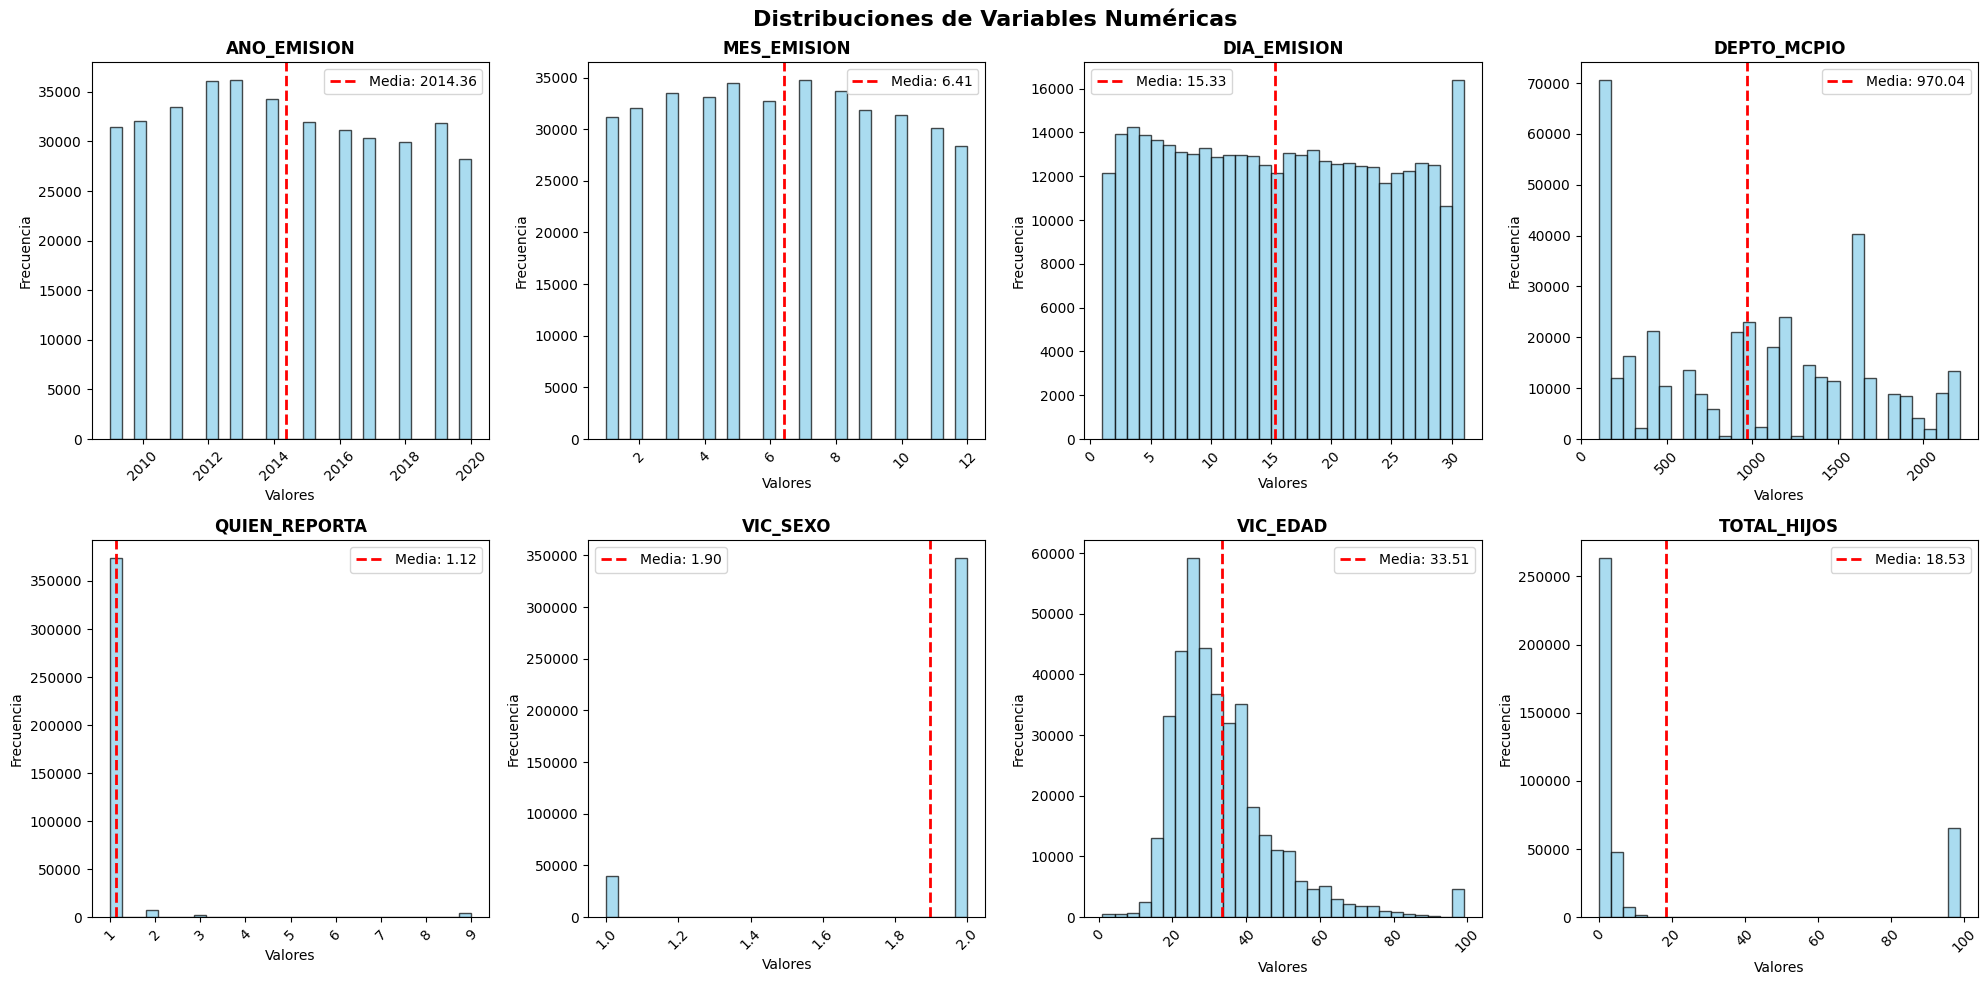


RESUMEN DE DISTRIBUCIONES OBSERVADAS

 ANO_EMISION:
   ── Normal: No
   ── Distribución: Aproximadamente simétrica
   ── Interpretación: Asimetría=0.069, Curtosis=-1.178

 MES_EMISION:
   ── Normal: No
   ── Distribución: Aproximadamente simétrica
   ── Interpretación: Asimetría=0.03, Curtosis=-1.172

 DIA_EMISION:
   ── Normal: No
   ── Distribución: Aproximadamente simétrica
   ── Interpretación: Asimetría=0.055, Curtosis=-1.194

 DEPTO_MCPIO:
   ── Normal: No
   ── Distribución: Aproximadamente simétrica
   ── Interpretación: Asimetría=0.135, Curtosis=-1.185

 QUIEN_REPORTA:
   ── Normal: No
   ── Distribución: Fuertemente sesgada a la derecha
   ── Interpretación: Asimetría=8.404, Curtosis=71.156

 VIC_SEXO:
   ── Normal: No
   ── Distribución: Fuertemente sesgada a la izquierda
   ── Interpretación: Asimetría=-2.6, Curtosis=4.762

 VIC_EDAD:
   ── Normal: No
   ── Distribución: Fuertemente sesgada a la derecha
   ── Interpretación: Asimetría=1.787, Curtosis=4.657

 TOTAL_HIJOS:
 

In [9]:
# CONTINUACIÓN INCISO 1B) - HISTOGRAMAS DE VARIABLES NUMÉRICAS

print("="*60)
print("VISUALIZACIÓN DE DISTRIBUCIONES - HISTOGRAMAS")
print("="*60)

# Configuramos el estilo de los gráficos
plt.style.use('default')
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))
fig.suptitle('Distribuciones de Variables Numéricas', fontsize=16, fontweight='bold')

# Aplanamos los ejes para facilitar la iteración
axes = axes.flatten()

for i, col in enumerate(variables_numericas):
   if i < len(axes):
      # Filtramos valores no nulos
      datos_limpios = data[col].dropna()
      
      # Creamos el histograma
      axes[i].hist(datos_limpios, bins=30, alpha=0.7, color='skyblue', edgecolor='black')
      axes[i].set_title(f'{col}', fontsize=12, fontweight='bold')
      axes[i].set_xlabel('Valores')
      axes[i].set_ylabel('Frecuencia')
      
      # Añadimos línea de la media
      media = datos_limpios.mean()
      axes[i].axvline(media, color='red', linestyle='--', linewidth=2, label=f'Media: {media:.2f}')
      axes[i].legend()
      
      # Rotamos etiquetas si es necesario
      axes[i].tick_params(axis='x', rotation=45)

# Ocultamos ejes vacíos si hay menos de 8 variables
for j in range(len(variables_numericas), len(axes)):
   axes[j].set_visible(False)

plt.tight_layout()
plt.show()

# Interpretación breve de cada distribución
print("\n" + "="*60)
print("RESUMEN DE DISTRIBUCIONES OBSERVADAS")
print("="*60)

for _, row in df_normalidad.iterrows():
   var = row['Variable']
   print(f"\n {var}:")
   print(f"   ── Normal: {row['Es_Normal']}")
   
   # Interpretación basada en asimetría
   if row['Asimetría'] > 1:
      print(f"   ── Distribución: Fuertemente sesgada a la derecha")
   elif row['Asimetría'] > 0.5:
      print(f"   ── Distribución: Moderadamente sesgada a la derecha")
   elif row['Asimetría'] < -1:
      print(f"   ── Distribución: Fuertemente sesgada a la izquierda")
   elif row['Asimetría'] < -0.5:
      print(f"   ── Distribución: Moderadamente sesgada a la izquierda")
   else:
      print(f"   ── Distribución: Aproximadamente simétrica")

   print(f"   ── Interpretación: Asimetría={row['Asimetría']}, Curtosis={row['Curtosis']}")

In [10]:
# INCISO 1B) - TABLAS DE FRECUENCIA PARA VARIABLES CATEGÓRICAS

print("="*60)
print("TABLAS DE FRECUENCIA - VARIABLES CATEGÓRICAS")
print("="*60)

# Diccionario de etiquetas basado en el diccionario de datos del INE
etiquetas = {
    'VIC_SEXO': {1.0: 'Hombre', 2.0: 'Mujer'},
    'AGR_SEXO': {1.0: 'Hombre', 2.0: 'Mujer'},
    'HEC_AREA': {1.0: 'Urbana', 2.0: 'Rural'},
    'QUIEN_REPORTA': {1.0: 'Victima', 2.0: 'Familiar de la victima', 3.0: 'Otro', 9.0: 'Ignorado'},
    'VIC_ALFAB': {1.0: 'Alfabeta', 2.0: 'Analfabeta', 9.0: 'Ignorado'},
    'VIC_EST_CIV': {1.0: 'Soltero(a)', 2.0: 'Casado(a)', 3.0: 'Unido(a)', 4.0: 'Viudo(a)', 5.0: 'Otro', 9.0: 'Ignorado'},
    'VIC_GRUPET': {1.0: 'Ladino', 2.0: 'Maya', 3.0: 'Garifuna', 4.0: 'Xinka', 5.0: 'Otro', 6.0: 'No indica', 9.0: 'Ignorado'},
    'VIC_TRABAJA': {1.0: 'Si trabaja', 2.0: 'No trabaja', 9.0: 'Ignorado'},
    'VIC_DISC': {1.0: 'Con discapacidad', 2.0: 'Sin discapacidad', 9.0: 'Ignorado'},
    'VIC_NACIONAL': {1.0: 'Guatemalteca', 2.0: 'Extranjera', 9.0: 'Ignorado'},
    'VIC_REL_AGR': {1.0: 'Esposo/a', 2.0: 'Conviviente', 3.0: 'Exconviviente', 4.0: 'Hijo/a', 
                    5.0: 'Hijastro/a', 6.0: 'Padre/Madre', 7.0: 'Nieto/a', 8.0: 'Suegro/a', 
                    9.0: 'Hermano/a', 10.0: 'Otro pariente'},
    'HEC_MES': {1.0: 'Enero', 2.0: 'Febrero', 3.0: 'Marzo', 4.0: 'Abril', 5.0: 'Mayo', 6.0: 'Junio',
                7.0: 'Julio', 8.0: 'Agosto', 9.0: 'Septiembre', 10.0: 'Octubre', 11.0: 'Noviembre', 12.0: 'Diciembre'},
    'MES_EMISION': {1.0: 'Enero', 2.0: 'Febrero', 3.0: 'Marzo', 4.0: 'Abril', 5.0: 'Mayo', 6.0: 'Junio',
                7.0: 'Julio', 8.0: 'Agosto', 9.0: 'Septiembre', 10.0: 'Octubre', 11.0: 'Noviembre', 12.0: 'Diciembre'}
}

# Variables categóricas principales a analizar
variables_categoricas = ['VIC_SEXO', 'AGR_SEXO', 'VIC_EST_CIV', 'VIC_GRUPET', 
                        'VIC_REL_AGR', 'VIC_TRABAJA', 'VIC_ALFAB', 'QUIEN_REPORTA']

# Filtrar solo las que existen en el dataset
variables_categoricas = [v for v in variables_categoricas if v in data.columns]

print(f"Variables categóricas a analizar: {len(variables_categoricas)}")
print("-"*60)

# Función para crear tabla de frecuencia con etiquetas
def crear_tabla_frecuencia(df, variable, etiquetas_dict):
    """Genera tabla de frecuencia con etiquetas descriptivas"""
    frecuencias = df[variable].value_counts().sort_index()
    total = frecuencias.sum()
    porcentajes = (frecuencias / total * 100).round(2)
    
    tabla = pd.DataFrame({
        'Codigo': frecuencias.index,
        'Frecuencia': frecuencias.values,
        'Porcentaje': porcentajes.values
    })
    
    # Agregar etiquetas si existen en el diccionario
    if variable in etiquetas_dict:
        tabla['Descripcion'] = tabla['Codigo'].map(etiquetas_dict[variable])
        tabla['Descripcion'] = tabla['Descripcion'].fillna('Otro/Desconocido')
        # Reordenar columnas
        tabla = tabla[['Codigo', 'Descripcion', 'Frecuencia', 'Porcentaje']]
    
    return tabla

# Generar tablas de frecuencia
for var in variables_categoricas:
    print(f"\n{'='*60}")
    print(f"VARIABLE: {var}")
    print(f"{'='*60}")
    
    tabla = crear_tabla_frecuencia(data, var, etiquetas)
    display(tabla)
    
    # Mostrar el valor más frecuente (moda)
    moda_codigo = data[var].mode().iloc[0] if len(data[var].mode()) > 0 else None
    if var in etiquetas and moda_codigo in etiquetas[var]:
        moda_desc = etiquetas[var][moda_codigo]
        print(f"\nValor más frecuente (moda): {moda_desc} (código {moda_codigo})")

TABLAS DE FRECUENCIA - VARIABLES CATEGÓRICAS
Variables categóricas a analizar: 8
------------------------------------------------------------

VARIABLE: VIC_SEXO


,Codigo,Descripcion,Frecuencia,Porcentaje
0,1.0,Hombre,40147,10.37
1,2.0,Mujer,347110,89.63



Valor más frecuente (moda): Mujer (código 2.0)

VARIABLE: AGR_SEXO


,Codigo,Descripcion,Frecuencia,Porcentaje
0,1.0,Hombre,338178,87.33
1,2.0,Mujer,49079,12.67



Valor más frecuente (moda): Hombre (código 1.0)

VARIABLE: VIC_EST_CIV


,Codigo,Descripcion,Frecuencia,Porcentaje
0,1.0,Soltero(a),68527,17.78
1,2.0,Casado(a),167131,43.35
2,3.0,Unido(a),97454,25.28
3,4.0,Viudo(a),2923,0.76
4,5.0,Otro,6780,1.76
5,9.0,Ignorado,42704,11.08



Valor más frecuente (moda): Casado(a) (código 2.0)

VARIABLE: VIC_GRUPET


,Codigo,Descripcion,Frecuencia,Porcentaje
0,1.0,Ladino,217833,56.25
1,2.0,Maya,118627,30.63
2,3.0,Garifuna,538,0.14
3,4.0,Xinka,560,0.14
4,5.0,Otro,2331,0.60
5,6.0,No indica,40972,10.58
6,9.0,Ignorado,6396,1.65



Valor más frecuente (moda): Ladino (código 1.0)

VARIABLE: VIC_REL_AGR


,Codigo,Descripcion,Frecuencia,Porcentaje
0,1.0,Esposo/a,130685,33.75
1,2.0,Conviviente,118909,30.71
2,3.0,Exconviviente,55533,14.34
3,4.0,Hijo/a,8352,2.16
4,5.0,Hijastro/a,1286,0.33
5,6.0,Padre/Madre,15994,4.13
6,7.0,Nieto/a,496,0.13
7,8.0,Suegro/a,4633,1.20
8,9.0,Hermano/a,17200,4.44
9,10.0,Otro pariente,34169,8.82



Valor más frecuente (moda): Esposo/a (código 1.0)

VARIABLE: VIC_TRABAJA


,Codigo,Descripcion,Frecuencia,Porcentaje
0,1.0,Si trabaja,126386,32.7
1,2.0,No trabaja,258208,66.8
2,9.0,Ignorado,1934,0.5



Valor más frecuente (moda): No trabaja (código 2.0)

VARIABLE: VIC_ALFAB


,Codigo,Descripcion,Frecuencia,Porcentaje
0,1.0,Alfabeta,312259,80.79
1,2.0,Analfabeta,72147,18.67
2,9.0,Ignorado,2122,0.55



Valor más frecuente (moda): Alfabeta (código 1.0)

VARIABLE: QUIEN_REPORTA


,Codigo,Descripcion,Frecuencia,Porcentaje
0,1.0,Victima,373508,96.45
1,2.0,Familiar de la victima,7050,1.82
2,3.0,Otro,2084,0.54
3,9.0,Ignorado,4615,1.19



Valor más frecuente (moda): Victima (código 1.0)


## 1c) Cruce de Variables Importantes

En esta seccion cruzamos las variables mas relevantes para identificar patrones y elementos clave que ayuden a comprender las causas de la violencia intrafamiliar.

Los cruces que realizaremos son:
1. **Sexo de la victima vs Sexo del agresor** - Para ver quien agrede a quien
2. **Relacion victima-agresor vs Sexo de la victima** - Para entender el tipo de relacion en que ocurre la violencia
3. **Estado civil vs Sexo de la victima** - Para ver en que situaciones conyugales hay mas violencia
4. **Grupo etnico vs Sexo de la victima** - Para ver si hay diferencias por grupo etnico
5. **Edad de la victima por sexo** - Para identificar rangos de edad mas vulnerables

CRUCE 1: SEXO DE LA VICTIMA VS SEXO DEL AGRESOR
Este cruce nos permite ver quien agrede a quien.
----------------------------------------------------------------------

Frecuencias absolutas:


AGR_SEXO,Hombre,Mujer,Total
VIC_SEXO,,,
Hombre,12376,27771,40147
Mujer,325802,21308,347110
Total,338178,49079,387257



Porcentaje por tipo de victima (fila):


AGR_SEXO,Hombre,Mujer
VIC_SEXO,,
Hombre,30.83,69.17
Mujer,93.86,6.14


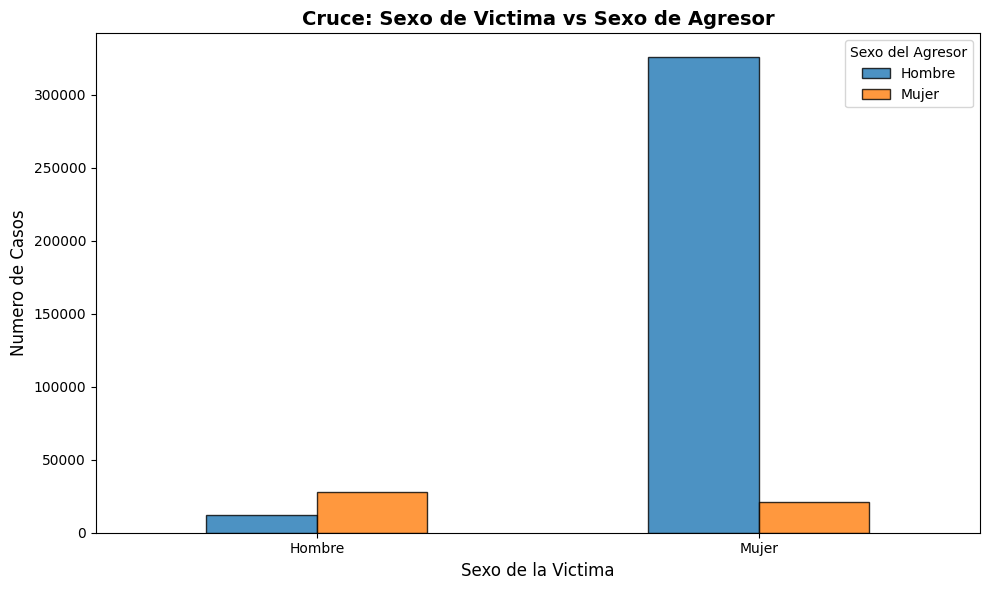


HALLAZGO: Este cruce muestra claramente quien agrede a quien en casos
de violencia intrafamiliar.


In [11]:
# INCISO 1C) - CRUCE DE VARIABLES IMPORTANTES

print("="*70)
print("CRUCE 1: SEXO DE LA VICTIMA VS SEXO DEL AGRESOR")
print("="*70)
print("Este cruce nos permite ver quien agrede a quien.")
print("-"*70)

# Tabla de contingencia
cruce1 = pd.crosstab(data['VIC_SEXO'], data['AGR_SEXO'], margins=True, margins_name='Total')

# Renombrar con etiquetas
cruce1.index = cruce1.index.map(lambda x: etiquetas['VIC_SEXO'].get(x, x) if x != 'Total' else x)
cruce1.columns = cruce1.columns.map(lambda x: etiquetas['AGR_SEXO'].get(x, x) if x != 'Total' else x)

print("\nFrecuencias absolutas:")
display(cruce1)

# Porcentajes por fila
cruce1_pct = pd.crosstab(data['VIC_SEXO'], data['AGR_SEXO'], normalize='index') * 100
cruce1_pct.index = cruce1_pct.index.map(lambda x: etiquetas['VIC_SEXO'].get(x, x))
cruce1_pct.columns = cruce1_pct.columns.map(lambda x: etiquetas['AGR_SEXO'].get(x, x))

print("\nPorcentaje por tipo de victima (fila):")
display(cruce1_pct.round(2))

# Visualizacion
fig, ax = plt.subplots(figsize=(10, 6))
cruce1_plot = pd.crosstab(data['VIC_SEXO'].map(etiquetas['VIC_SEXO']), 
                          data['AGR_SEXO'].map(etiquetas['AGR_SEXO']))
cruce1_plot.plot(kind='bar', ax=ax, edgecolor='black', alpha=0.8)
ax.set_xlabel('Sexo de la Victima', fontsize=12)
ax.set_ylabel('Numero de Casos', fontsize=12)
ax.set_title('Cruce: Sexo de Victima vs Sexo de Agresor', fontsize=14, fontweight='bold')
ax.legend(title='Sexo del Agresor')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

print("\nHALLAZGO: Este cruce muestra claramente quien agrede a quien en casos")
print("de violencia intrafamiliar.")

CRUCE 2: RELACION VICTIMA-AGRESOR VS SEXO DE LA VICTIMA
Este cruce nos muestra en que tipo de relacion ocurre mas la violencia.
----------------------------------------------------------------------

Frecuencias absolutas:


VIC_SEXO,Hombre,Mujer,Total
VIC_REL_AGR,,,
Esposo/a,10279,120406,130685
Conviviente,7247,111662,118909
Exconviviente,5409,50124,55533
Hijo/a,1986,6366,8352
Hijastro/a,210,1076,1286
Padre/Madre,5063,10931,15994
Nieto/a,105,391,496
Suegro/a,833,3800,4633
Hermano/a,3423,13777,17200



Porcentaje por sexo de victima (columna):


VIC_SEXO,Hombre,Mujer
VIC_REL_AGR,,
Esposo/a,25.60,34.69
Conviviente,18.05,32.17
Exconviviente,13.47,14.44
Hijo/a,4.95,1.83
Hijastro/a,0.52,0.31
Padre/Madre,12.61,3.15
Nieto/a,0.26,0.11
Suegro/a,2.07,1.09
Hermano/a,8.53,3.97


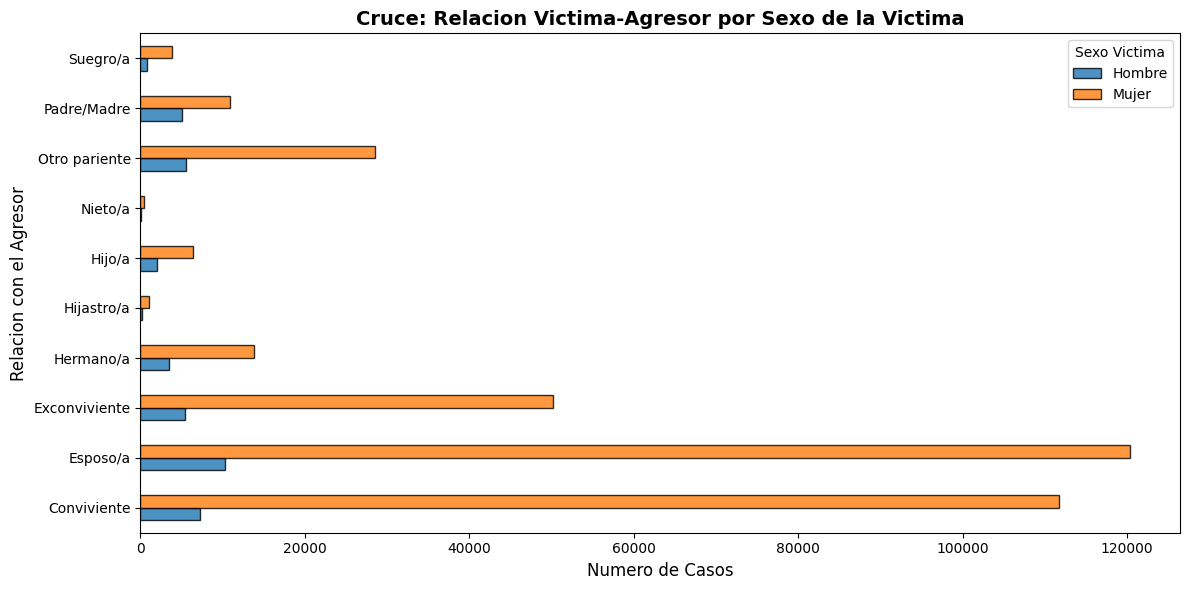


HALLAZGO: Este cruce revela que tipo de relacion familiar es mas
propensa a la violencia, diferenciando por sexo de la victima.


In [12]:
# CRUCE 2: RELACION VICTIMA-AGRESOR VS SEXO DE LA VICTIMA

print("="*70)
print("CRUCE 2: RELACION VICTIMA-AGRESOR VS SEXO DE LA VICTIMA")
print("="*70)
print("Este cruce nos muestra en que tipo de relacion ocurre mas la violencia.")
print("-"*70)

# Tabla de contingencia
cruce2 = pd.crosstab(data['VIC_REL_AGR'], data['VIC_SEXO'], margins=True, margins_name='Total')

# Renombrar con etiquetas
cruce2.index = cruce2.index.map(lambda x: etiquetas['VIC_REL_AGR'].get(x, x) if x != 'Total' else x)
cruce2.columns = cruce2.columns.map(lambda x: etiquetas['VIC_SEXO'].get(x, x) if x != 'Total' else x)

print("\nFrecuencias absolutas:")
display(cruce2)

# Porcentajes por columna (para ver distribucion dentro de cada sexo)
cruce2_pct = pd.crosstab(data['VIC_REL_AGR'], data['VIC_SEXO'], normalize='columns') * 100
cruce2_pct.index = cruce2_pct.index.map(lambda x: etiquetas['VIC_REL_AGR'].get(x, x))
cruce2_pct.columns = cruce2_pct.columns.map(lambda x: etiquetas['VIC_SEXO'].get(x, x))

print("\nPorcentaje por sexo de victima (columna):")
display(cruce2_pct.round(2))

# Visualizacion
fig, ax = plt.subplots(figsize=(12, 6))
cruce2_plot = pd.crosstab(data['VIC_REL_AGR'].map(etiquetas['VIC_REL_AGR']), 
                          data['VIC_SEXO'].map(etiquetas['VIC_SEXO']))
cruce2_plot.plot(kind='barh', ax=ax, edgecolor='black', alpha=0.8)
ax.set_ylabel('Relacion con el Agresor', fontsize=12)
ax.set_xlabel('Numero de Casos', fontsize=12)
ax.set_title('Cruce: Relacion Victima-Agresor por Sexo de la Victima', fontsize=14, fontweight='bold')
ax.legend(title='Sexo Victima')
plt.tight_layout()
plt.show()

print("\nHALLAZGO: Este cruce revela que tipo de relacion familiar es mas")
print("propensa a la violencia, diferenciando por sexo de la victima.")

CRUCE 3: ESTADO CIVIL VS SEXO DE LA VICTIMA
Este cruce nos muestra en que situacion conyugal hay mas violencia.
----------------------------------------------------------------------

Frecuencias absolutas:

Frecuencias absolutas:


VIC_SEXO,Hombre,Mujer,Total
VIC_EST_CIV,,,
Soltero(a),7691,60836,68527
Casado(a),19129,148002,167131
Unido(a),7648,89806,97454
Viudo(a),389,2534,2923
Otro,803,5977,6780
Ignorado,3743,38961,42704
Total,39403,346116,385519



Porcentaje por sexo de victima (columna):


VIC_SEXO,Hombre,Mujer
VIC_EST_CIV,,
Soltero(a),19.52,17.58
Casado(a),48.55,42.76
Unido(a),19.41,25.95
Viudo(a),0.99,0.73
Otro,2.04,1.73
Ignorado,9.50,11.26


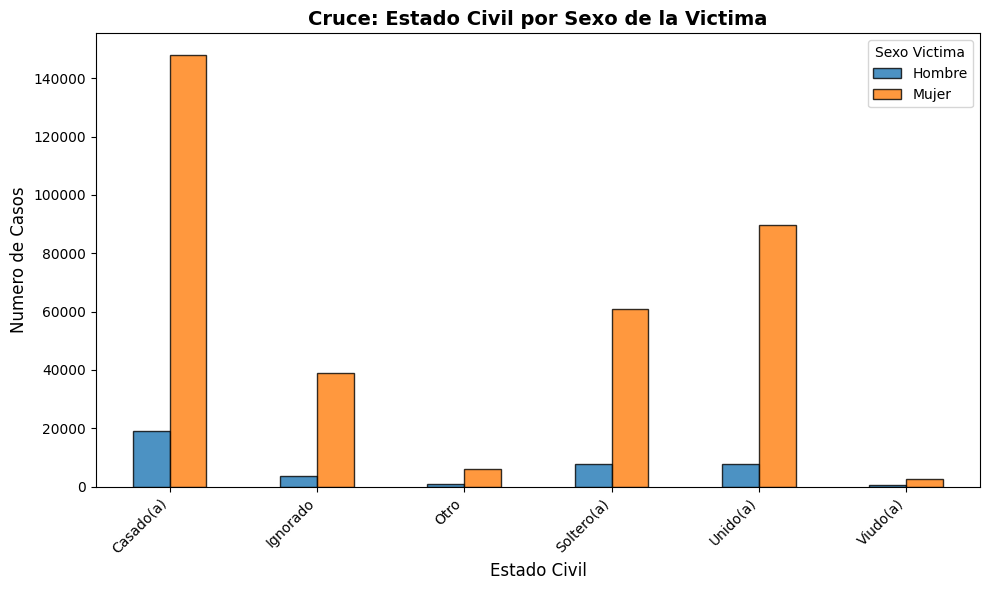


HALLAZGO: Este cruce muestra si el estado civil influye en la
vulnerabilidad a sufrir violencia intrafamiliar.


In [13]:
# CRUCE 3: ESTADO CIVIL VS SEXO DE LA VICTIMA

print("="*70)
print("CRUCE 3: ESTADO CIVIL VS SEXO DE LA VICTIMA")
print("="*70)
print("Este cruce nos muestra en que situacion conyugal hay mas violencia.")
print("-"*70)

# Tabla de contingencia
cruce3 = pd.crosstab(data['VIC_EST_CIV'], data['VIC_SEXO'], margins=True, margins_name='Total')

# Renombrar con etiquetas
cruce3.index = cruce3.index.map(lambda x: etiquetas['VIC_EST_CIV'].get(x, x) if x != 'Total' else x)
cruce3.columns = cruce3.columns.map(lambda x: etiquetas['VIC_SEXO'].get(x, x) if x != 'Total' else x)

print("\nFrecuencias absolutas:")
display(cruce3)

# Porcentajes por columna
cruce3_pct = pd.crosstab(data['VIC_EST_CIV'], data['VIC_SEXO'], normalize='columns') * 100
cruce3_pct.index = cruce3_pct.index.map(lambda x: etiquetas['VIC_EST_CIV'].get(x, x))
cruce3_pct.columns = cruce3_pct.columns.map(lambda x: etiquetas['VIC_SEXO'].get(x, x))

print("\nPorcentaje por sexo de victima (columna):")
display(cruce3_pct.round(2))

# Visualizacion
fig, ax = plt.subplots(figsize=(10, 6))
cruce3_plot = pd.crosstab(data['VIC_EST_CIV'].map(etiquetas['VIC_EST_CIV']), 
                          data['VIC_SEXO'].map(etiquetas['VIC_SEXO']))
cruce3_plot.plot(kind='bar', ax=ax, edgecolor='black', alpha=0.8)
ax.set_xlabel('Estado Civil', fontsize=12)
ax.set_ylabel('Numero de Casos', fontsize=12)
ax.set_title('Cruce: Estado Civil por Sexo de la Victima', fontsize=14, fontweight='bold')
ax.legend(title='Sexo Victima')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print("\nHALLAZGO: Este cruce muestra si el estado civil influye en la")
print("vulnerabilidad a sufrir violencia intrafamiliar.")

CRUCE 4: GRUPO ETNICO VS SEXO DE LA VICTIMA
Este cruce nos permite ver si hay diferencias por grupo etnico.
----------------------------------------------------------------------

Frecuencias absolutas:


VIC_SEXO,Hombre,Mujer,Total
VIC_GRUPET,,,
Ladino,23359,194474,217833
Maya,12174,106453,118627
Garifuna,47,491,538
Xinka,63,497,560
Otro,251,2080,2331
No indica,3618,37354,40972
Ignorado,635,5761,6396
Total,40147,347110,387257



Porcentaje por sexo de victima (columna):


VIC_SEXO,Hombre,Mujer
VIC_GRUPET,,
Ladino,58.18,56.03
Maya,30.32,30.67
Garifuna,0.12,0.14
Xinka,0.16,0.14
Otro,0.63,0.60
No indica,9.01,10.76
Ignorado,1.58,1.66


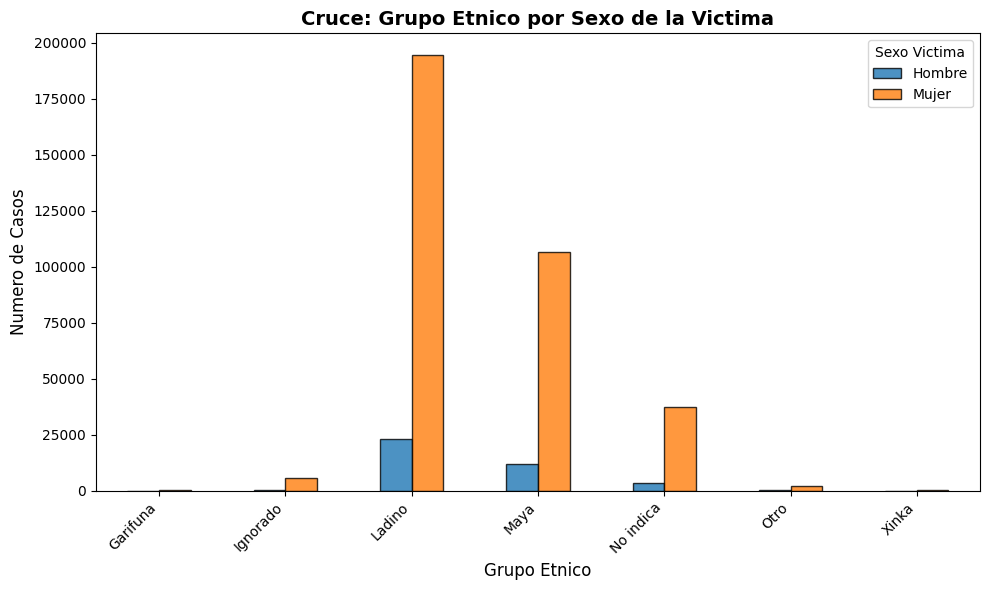


HALLAZGO: Este cruce permite ver si hay diferencias en la violencia
intrafamiliar segun el grupo etnico de la victima.


In [14]:
# CRUCE 4: GRUPO ETNICO VS SEXO DE LA VICTIMA

print("="*70)
print("CRUCE 4: GRUPO ETNICO VS SEXO DE LA VICTIMA")
print("="*70)
print("Este cruce nos permite ver si hay diferencias por grupo etnico.")
print("-"*70)

# Tabla de contingencia
cruce4 = pd.crosstab(data['VIC_GRUPET'], data['VIC_SEXO'], margins=True, margins_name='Total')

# Renombrar con etiquetas
cruce4.index = cruce4.index.map(lambda x: etiquetas['VIC_GRUPET'].get(x, x) if x != 'Total' else x)
cruce4.columns = cruce4.columns.map(lambda x: etiquetas['VIC_SEXO'].get(x, x) if x != 'Total' else x)

print("\nFrecuencias absolutas:")
display(cruce4)

# Porcentajes por columna
cruce4_pct = pd.crosstab(data['VIC_GRUPET'], data['VIC_SEXO'], normalize='columns') * 100
cruce4_pct.index = cruce4_pct.index.map(lambda x: etiquetas['VIC_GRUPET'].get(x, x))
cruce4_pct.columns = cruce4_pct.columns.map(lambda x: etiquetas['VIC_SEXO'].get(x, x))

print("\nPorcentaje por sexo de victima (columna):")
display(cruce4_pct.round(2))

# Visualizacion
fig, ax = plt.subplots(figsize=(10, 6))
cruce4_plot = pd.crosstab(data['VIC_GRUPET'].map(etiquetas['VIC_GRUPET']), 
                          data['VIC_SEXO'].map(etiquetas['VIC_SEXO']))
cruce4_plot.plot(kind='bar', ax=ax, edgecolor='black', alpha=0.8)
ax.set_xlabel('Grupo Etnico', fontsize=12)
ax.set_ylabel('Numero de Casos', fontsize=12)
ax.set_title('Cruce: Grupo Etnico por Sexo de la Victima', fontsize=14, fontweight='bold')
ax.legend(title='Sexo Victima')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print("\nHALLAZGO: Este cruce permite ver si hay diferencias en la violencia")
print("intrafamiliar segun el grupo etnico de la victima.")

CRUCE 5: EDAD DE LA VICTIMA POR SEXO
Este cruce nos permite ver que edades son mas vulnerables por sexo.
----------------------------------------------------------------------

Estadisticas de edad por sexo:

Estadisticas de edad por sexo:


,count,mean,std,min,25%,50%,75%,max
VIC_SEXO,,,,,,,,
Hombre,40147.0,40.26,18.00,1.0,27.0,36.0,51.0,99.0
Mujer,347110.0,32.73,13.78,1.0,23.0,30.0,38.0,99.0


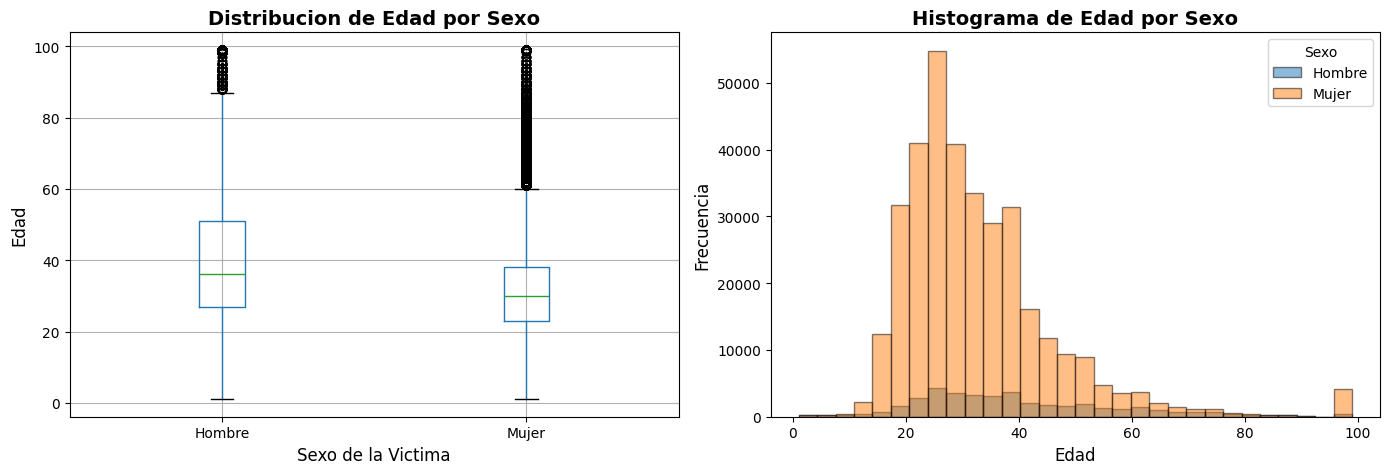


Distribucion por rango de edad y sexo:


VIC_SEXO,Hombre,Mujer,Total
RANGO_EDAD,,,
0-12,835,1264,2099
13-17,940,14076,15016
18-25,6494,101165,107659
26-35,10969,120964,131933
36-45,8027,64714,72741
46-55,5031,24901,29932
56-65,3634,9915,13549
66+,4217,10111,14328
Total,40147,347110,387257



HALLAZGO: Este cruce revela los rangos de edad mas vulnerables
a la violencia intrafamiliar, diferenciando por sexo.


In [15]:
# CRUCE 5: EDAD DE LA VICTIMA POR SEXO

print("="*70)
print("CRUCE 5: EDAD DE LA VICTIMA POR SEXO")
print("="*70)
print("Este cruce nos permite ver que edades son mas vulnerables por sexo.")
print("-"*70)

# Estadisticas de edad por sexo
edad_por_sexo = data.groupby('VIC_SEXO')['VIC_EDAD'].describe()
edad_por_sexo.index = edad_por_sexo.index.map(etiquetas['VIC_SEXO'])

print("\nEstadisticas de edad por sexo:")
display(edad_por_sexo.round(2))

# Boxplot de edad por sexo
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Boxplot
ax1 = axes[0]
data_boxplot = data[['VIC_SEXO', 'VIC_EDAD']].dropna().copy()
data_boxplot['VIC_SEXO'] = data_boxplot['VIC_SEXO'].map(etiquetas['VIC_SEXO'])
data_boxplot.boxplot(column='VIC_EDAD', by='VIC_SEXO', ax=ax1)
ax1.set_xlabel('Sexo de la Victima', fontsize=12)
ax1.set_ylabel('Edad', fontsize=12)
ax1.set_title('Distribucion de Edad por Sexo', fontsize=14, fontweight='bold')
plt.suptitle('')  # Quitar titulo automatico

# Histograma superpuesto
ax2 = axes[1]
for sexo_code, sexo_label in etiquetas['VIC_SEXO'].items():
    edades = data[data['VIC_SEXO'] == sexo_code]['VIC_EDAD'].dropna()
    ax2.hist(edades, bins=30, alpha=0.5, label=sexo_label, edgecolor='black')

ax2.set_xlabel('Edad', fontsize=12)
ax2.set_ylabel('Frecuencia', fontsize=12)
ax2.set_title('Histograma de Edad por Sexo', fontsize=14, fontweight='bold')
ax2.legend(title='Sexo')

plt.tight_layout()
plt.show()

# Crear rangos de edad para analisis
data['RANGO_EDAD'] = pd.cut(data['VIC_EDAD'], 
                            bins=[0, 12, 17, 25, 35, 45, 55, 65, 100],
                            labels=['0-12', '13-17', '18-25', '26-35', '36-45', '46-55', '56-65', '66+'])

print("\nDistribucion por rango de edad y sexo:")
cruce5 = pd.crosstab(data['RANGO_EDAD'], data['VIC_SEXO'].map(etiquetas['VIC_SEXO']), margins=True, margins_name='Total')
display(cruce5)

print("\nHALLAZGO: Este cruce revela los rangos de edad mas vulnerables")
print("a la violencia intrafamiliar, diferenciando por sexo.")

In [16]:
# RESUMEN DE HALLAZGOS DEL INCISO 1C

print("="*70)
print("RESUMEN DE HALLAZGOS - CRUCE DE VARIABLES")
print("="*70)

# Calcular estadisticas clave para el resumen
total_casos = len(data)
mujeres_victimas = (data['VIC_SEXO'] == 2.0).sum()
hombres_victimas = (data['VIC_SEXO'] == 1.0).sum()
pct_mujeres = (mujeres_victimas / total_casos * 100)
pct_hombres = (hombres_victimas / total_casos * 100)

# Agresor mas comun cuando victima es mujer
agresores_mujeres = data[data['VIC_SEXO'] == 2.0]['AGR_SEXO'].value_counts()
agresor_hombre_a_mujer = agresores_mujeres.get(1.0, 0)
pct_hombre_agrede_mujer = (agresor_hombre_a_mujer / mujeres_victimas * 100) if mujeres_victimas > 0 else 0

# Relacion mas comun
relacion_comun = data['VIC_REL_AGR'].mode().iloc[0]
relacion_comun_label = etiquetas['VIC_REL_AGR'].get(relacion_comun, 'Desconocido')

# Estado civil mas comun
estado_comun = data['VIC_EST_CIV'].mode().iloc[0]
estado_comun_label = etiquetas['VIC_EST_CIV'].get(estado_comun, 'Desconocido')

print(f"""
HALLAZGOS PRINCIPALES:

1. PERFIL DE VICTIMAS:
   - Total de casos analizados: {total_casos:,}
   - Mujeres victimas: {mujeres_victimas:,} ({pct_mujeres:.1f}%)
   - Hombres victimas: {hombres_victimas:,} ({pct_hombres:.1f}%)

2. PATRON AGRESOR-VICTIMA:
   - El {pct_hombre_agrede_mujer:.1f}% de las mujeres son agredidas por hombres
   - Esto confirma un patron claro de violencia de genero

3. RELACION MAS COMUN:
   - La relacion mas frecuente entre victima y agresor es: {relacion_comun_label}
   
4. ESTADO CIVIL MAS AFECTADO:
   - El estado civil con mas casos es: {estado_comun_label}

5. EDAD DE VICTIMAS:
   - Edad promedio victimas mujeres: {data[data['VIC_SEXO']==2.0]['VIC_EDAD'].mean():.1f} anios
   - Edad promedio victimas hombres: {data[data['VIC_SEXO']==1.0]['VIC_EDAD'].mean():.1f} anios

CONCLUSION:
Los cruces de variables revelan que la violencia intrafamiliar en Guatemala
afecta principalmente a mujeres, siendo el agresor tipicamente un hombre
con quien la victima tiene una relacion de pareja (esposo o conviviente).
""")

print("="*70)

RESUMEN DE HALLAZGOS - CRUCE DE VARIABLES

HALLAZGOS PRINCIPALES:

1. PERFIL DE VICTIMAS:
   - Total de casos analizados: 387,257
   - Mujeres victimas: 347,110 (89.6%)
   - Hombres victimas: 40,147 (10.4%)

2. PATRON AGRESOR-VICTIMA:
   - El 93.9% de las mujeres son agredidas por hombres
   - Esto confirma un patron claro de violencia de genero

3. RELACION MAS COMUN:
   - La relacion mas frecuente entre victima y agresor es: Esposo/a
   
4. ESTADO CIVIL MAS AFECTADO:
   - El estado civil con mas casos es: Casado(a)

5. EDAD DE VICTIMAS:
   - Edad promedio victimas mujeres: 32.7 anios
   - Edad promedio victimas hombres: 40.3 anios

CONCLUSION:
Los cruces de variables revelan que la violencia intrafamiliar en Guatemala
afecta principalmente a mujeres, siendo el agresor tipicamente un hombre
con quien la victima tiene una relacion de pareja (esposo o conviviente).



## 1d) Preguntas de Investigacion - Validacion de Hipotesis

En esta seccion formulamos 5 preguntas de investigacion basadas en supuestos o creencias previas sobre la violencia intrafamiliar. Cada hipotesis sera validada o refutada mediante el analisis de los datos.

Las preguntas que exploraremos son:

1. **Hipotesis 1:** La violencia intrafamiliar ha aumentado con el paso de los anios (2009-2020)
2. **Hipotesis 2:** La violencia intrafamiliar ocurre mas en areas urbanas que rurales
3. **Hipotesis 3:** Las victimas con menor nivel de escolaridad sufren mas violencia
4. **Hipotesis 4:** Existe un patron temporal donde ciertos meses del anio tienen mas casos
5. **Hipotesis 5:** Las mujeres que no trabajan (amas de casa) son mas vulnerables a la violencia

PREGUNTA 1: La violencia intrafamiliar ha aumentado entre 2009 y 2020?

SUPUESTO INICIAL:
Se cree que la violencia intrafamiliar ha ido en aumento con el paso de los 
anios debido a factores como el estres economico, cambios sociales y mayor 
densidad poblacional.

Casos reportados por anio:


,Anio,Casos
0,2009,31497
1,2010,32017
2,2011,33484
3,2012,36107
4,2013,36170
5,2014,34330
6,2015,31929
7,2016,31190
8,2017,30384
9,2018,29992


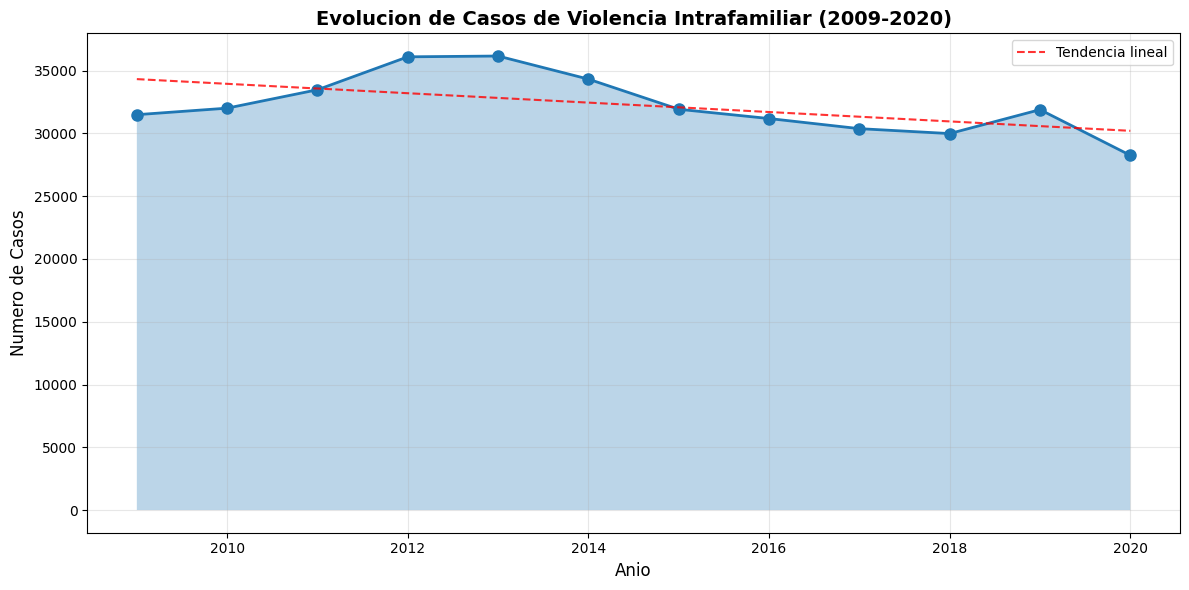

---------------------------------------------------------------------------
VALIDACION DE LA HIPOTESIS:
---------------------------------------------------------------------------

Datos encontrados:
- Casos en 2009: 31,497
- Casos en 2020: 28,259
- Cambio porcentual: -10.3%

CONCLUSION:

HIPOTESIS REFUTADA: Contrario a lo esperado, los casos han DISMINUIDO
(-10.3% entre 2009 y 2020).
Esto podria deberse a: menor reporte, mejores politicas de prevencion,
o efectos de la pandemia COVID-19 en 2020.

Nota: Es importante considerar que una disminucion en 2020 podria estar
relacionada con el confinamiento por COVID-19 y menor acceso a denuncias.


In [17]:
# INCISO 1D) PREGUNTA DE INVESTIGACION 1
# ============================================================================
# HIPOTESIS 1: La violencia intrafamiliar ha aumentado con el paso de los anios
# ============================================================================

print("="*75)
print("PREGUNTA 1: La violencia intrafamiliar ha aumentado entre 2009 y 2020?")
print("="*75)

print("""
SUPUESTO INICIAL:
Se cree que la violencia intrafamiliar ha ido en aumento con el paso de los 
anios debido a factores como el estres economico, cambios sociales y mayor 
densidad poblacional.
""")

# Analisis: Casos por anio
casos_por_anio = data['__source_year'].value_counts().sort_index()
casos_por_anio_df = pd.DataFrame({
    'Anio': casos_por_anio.index,
    'Casos': casos_por_anio.values
})

print("Casos reportados por anio:")
display(casos_por_anio_df)

# Calcular tasa de cambio
primer_anio = int(casos_por_anio.index[0])
ultimo_anio = int(casos_por_anio.index[-1])
casos_inicio = casos_por_anio.iloc[0]
casos_fin = casos_por_anio.iloc[-1]
cambio_porcentual = ((casos_fin - casos_inicio) / casos_inicio) * 100

# Visualizacion
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(casos_por_anio.index.astype(int), casos_por_anio.values, marker='o', linewidth=2, markersize=8)
ax.fill_between(casos_por_anio.index.astype(int), casos_por_anio.values, alpha=0.3)
ax.set_xlabel('Anio', fontsize=12)
ax.set_ylabel('Numero de Casos', fontsize=12)
ax.set_title('Evolucion de Casos de Violencia Intrafamiliar (2009-2020)', fontsize=14, fontweight='bold')
ax.grid(True, alpha=0.3)

# Anadir linea de tendencia
z = np.polyfit(range(len(casos_por_anio)), casos_por_anio.values, 1)
p = np.poly1d(z)
ax.plot(casos_por_anio.index.astype(int), p(range(len(casos_por_anio))), 
        "r--", alpha=0.8, label=f'Tendencia lineal')
ax.legend()

plt.tight_layout()
plt.show()

# Conclusion
print("-"*75)
print("VALIDACION DE LA HIPOTESIS:")
print("-"*75)
print(f"""
Datos encontrados:
- Casos en {primer_anio}: {casos_inicio:,}
- Casos en {ultimo_anio}: {casos_fin:,}
- Cambio porcentual: {cambio_porcentual:+.1f}%

CONCLUSION:
""")

if cambio_porcentual > 10:
    print("HIPOTESIS CONFIRMADA: Los datos muestran un aumento significativo en los")
    print(f"casos reportados ({cambio_porcentual:+.1f}% entre {primer_anio} y {ultimo_anio}).")
elif cambio_porcentual < -10:
    print("HIPOTESIS REFUTADA: Contrario a lo esperado, los casos han DISMINUIDO")
    print(f"({cambio_porcentual:.1f}% entre {primer_anio} y {ultimo_anio}).")
    print("Esto podria deberse a: menor reporte, mejores politicas de prevencion,")
    print("o efectos de la pandemia COVID-19 en 2020.")
else:
    print("HIPOTESIS PARCIALMENTE REFUTADA: Los casos se han mantenido relativamente")
    print(f"estables ({cambio_porcentual:+.1f}% de cambio), sin una tendencia clara de aumento.")

print("\nNota: Es importante considerar que una disminucion en 2020 podria estar")
print("relacionada con el confinamiento por COVID-19 y menor acceso a denuncias.")
print("="*75)

PREGUNTA 2: Ocurre mas violencia intrafamiliar en areas urbanas?

SUPUESTO INICIAL:
Se cree que en las areas urbanas hay mas casos de violencia intrafamiliar 
debido a factores como el estres, hacinamiento, desempleo y mayor acceso 
a sustancias como el alcohol.

Distribucion de casos por area geografica:


,Codigo,Area,Casos,Porcentaje
0,1.0,Urbana,210589,54.38
1,2.0,Rural,158325,40.88
2,9.0,NaN,18343,4.74


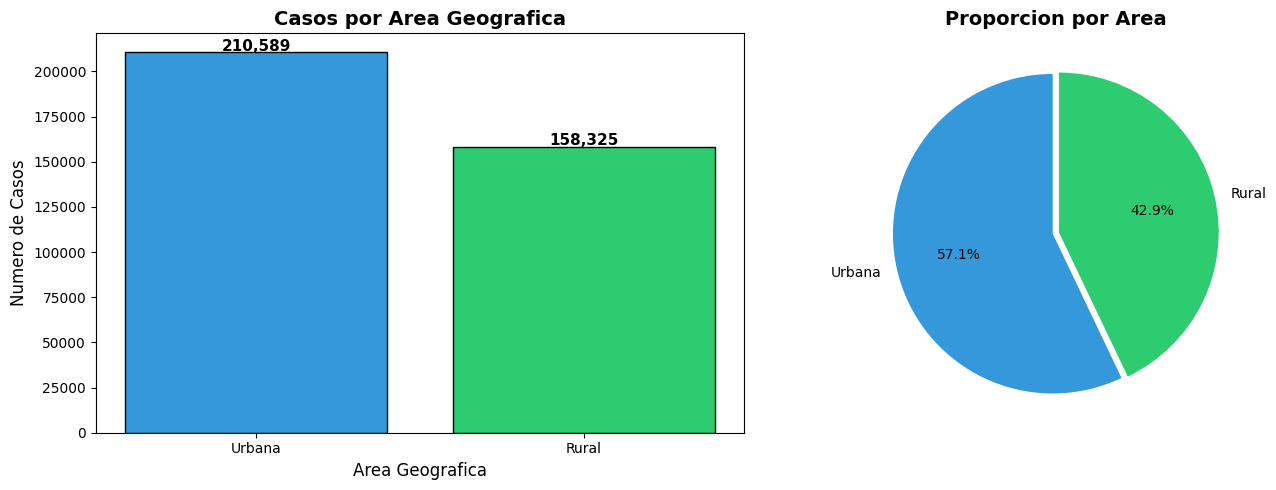

---------------------------------------------------------------------------
VALIDACION DE LA HIPOTESIS:
---------------------------------------------------------------------------

Datos encontrados:
- Casos en area urbana: 210,589 (54.4%)
- Casos en area rural: 158,325 (40.9%)
- Diferencia: 52,264 casos

CONCLUSION:

HIPOTESIS CONFIRMADA: Los datos muestran que la mayoria de los casos
de violencia intrafamiliar ocurren en areas URBANAS (54.4%).
Esto puede explicarse por: mayor densidad poblacional, mayor acceso a
mecanismos de denuncia, o factores de estres urbano.


In [18]:
# PREGUNTA DE INVESTIGACION 2
# ============================================================================
# HIPOTESIS 2: La violencia intrafamiliar ocurre mas en areas urbanas que rurales
# ============================================================================

print("="*75)
print("PREGUNTA 2: Ocurre mas violencia intrafamiliar en areas urbanas?")
print("="*75)

print("""
SUPUESTO INICIAL:
Se cree que en las areas urbanas hay mas casos de violencia intrafamiliar 
debido a factores como el estres, hacinamiento, desempleo y mayor acceso 
a sustancias como el alcohol.
""")

# Verificar si existe la variable HEC_AREA
if 'HEC_AREA' in data.columns:
    # Analisis: Casos por area
    casos_por_area = data['HEC_AREA'].value_counts().sort_index()
    total_casos_area = casos_por_area.sum()
    
    # Crear tabla con etiquetas
    area_df = pd.DataFrame({
        'Codigo': casos_por_area.index,
        'Area': casos_por_area.index.map(etiquetas.get('HEC_AREA', {})),
        'Casos': casos_por_area.values,
        'Porcentaje': (casos_por_area.values / total_casos_area * 100).round(2)
    })
    
    print("Distribucion de casos por area geografica:")
    display(area_df)
    
    # Obtener valores
    casos_urbana = casos_por_area.get(1.0, 0)
    casos_rural = casos_por_area.get(2.0, 0)
    pct_urbana = (casos_urbana / total_casos_area * 100)
    pct_rural = (casos_rural / total_casos_area * 100)
    
    # Visualizacion
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    
    # Grafico de barras
    ax1 = axes[0]
    areas = ['Urbana', 'Rural']
    valores = [casos_urbana, casos_rural]
    colores = ['#3498db', '#2ecc71']
    ax1.bar(areas, valores, color=colores, edgecolor='black')
    ax1.set_xlabel('Area Geografica', fontsize=12)
    ax1.set_ylabel('Numero de Casos', fontsize=12)
    ax1.set_title('Casos por Area Geografica', fontsize=14, fontweight='bold')
    
    # Anadir etiquetas de valor
    for i, (area, valor) in enumerate(zip(areas, valores)):
        ax1.text(i, valor + 1000, f'{valor:,}', ha='center', fontsize=11, fontweight='bold')
    
    # Grafico de pie
    ax2 = axes[1]
    ax2.pie([casos_urbana, casos_rural], labels=['Urbana', 'Rural'], 
            autopct='%1.1f%%', colors=colores, startangle=90, explode=(0.02, 0.02))
    ax2.set_title('Proporcion por Area', fontsize=14, fontweight='bold')
    
    plt.tight_layout()
    plt.show()
    
    # Conclusion
    print("-"*75)
    print("VALIDACION DE LA HIPOTESIS:")
    print("-"*75)
    print(f"""
Datos encontrados:
- Casos en area urbana: {casos_urbana:,} ({pct_urbana:.1f}%)
- Casos en area rural: {casos_rural:,} ({pct_rural:.1f}%)
- Diferencia: {abs(casos_urbana - casos_rural):,} casos

CONCLUSION:
""")
    
    if pct_urbana > pct_rural + 10:
        print("HIPOTESIS CONFIRMADA: Los datos muestran que la mayoria de los casos")
        print(f"de violencia intrafamiliar ocurren en areas URBANAS ({pct_urbana:.1f}%).")
        print("Esto puede explicarse por: mayor densidad poblacional, mayor acceso a")
        print("mecanismos de denuncia, o factores de estres urbano.")
    elif pct_rural > pct_urbana + 10:
        print("HIPOTESIS REFUTADA: Contrario a lo esperado, hay MAS casos en areas")
        print(f"RURALES ({pct_rural:.1f}%) que urbanas ({pct_urbana:.1f}%).")
    else:
        print("HIPOTESIS PARCIALMENTE CONFIRMADA: Aunque hay mas casos urbanos,")
        print("la diferencia no es tan marcada como se esperaba.")
        
else:
    print("La variable HEC_AREA no esta disponible en el dataset.")
    print("No es posible validar esta hipotesis con los datos actuales.")

print("="*75)

PREGUNTA 3: Las victimas con menor escolaridad son mas vulnerables?

SUPUESTO INICIAL:
Se cree que las personas con menor nivel educativo son mas vulnerables a 
sufrir violencia intrafamiliar, ya que pueden tener menor acceso a recursos
economicos, menor conocimiento de sus derechos y mayor dependencia economica.

Distribucion por nivel de alfabetismo:


,Codigo,Condicion,Casos,Porcentaje
0,1.0,Alfabeta,312259,80.79
1,2.0,Analfabeta,72147,18.67
2,9.0,Ignorado,2122,0.55


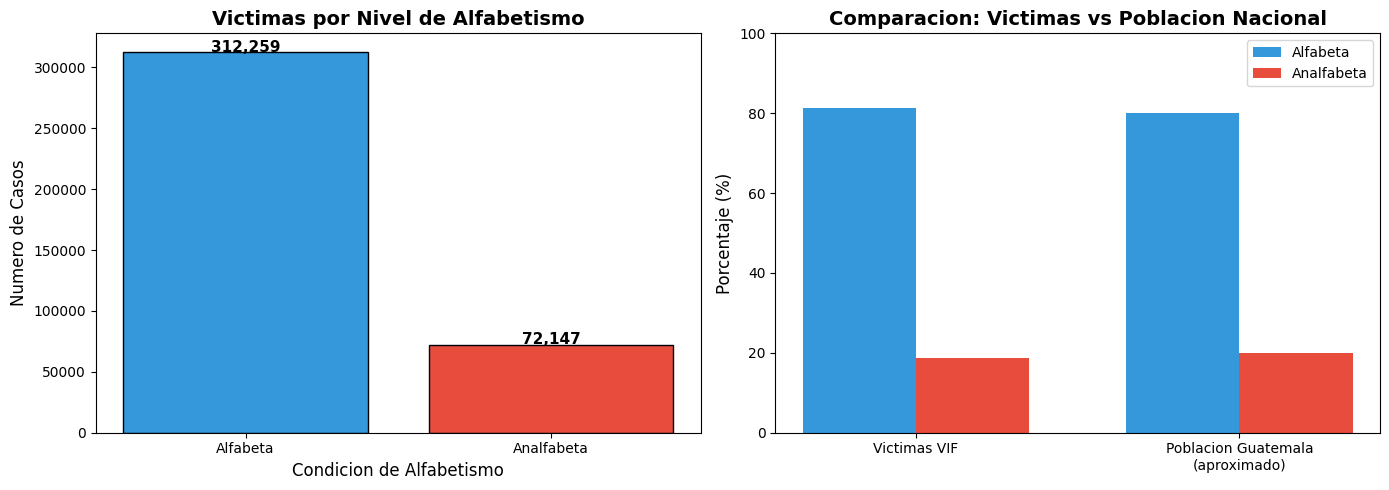

---------------------------------------------------------------------------
VALIDACION DE LA HIPOTESIS:
---------------------------------------------------------------------------

Datos encontrados:
- Victimas alfabetas: 312,259 (81.2%)
- Victimas analfabetas: 72,147 (18.8%)
- Tasa de alfabetismo nacional (aproximada): 80%

Comparacion:
- Analfabetismo en victimas: 18.8%
- Analfabetismo nacional aproximado: 20%

CONCLUSION:

HIPOTESIS PARCIALMENTE REFUTADA: Aunque la mayoria de victimas son
alfabetas, esto refleja la composicion de la poblacion general.
La escolaridad por si sola no parece ser un factor determinante.


In [19]:
# PREGUNTA DE INVESTIGACION 3
# ============================================================================
# HIPOTESIS 3: Las victimas con menor nivel de escolaridad sufren mas violencia
# ============================================================================

print("="*75)
print("PREGUNTA 3: Las victimas con menor escolaridad son mas vulnerables?")
print("="*75)

print("""
SUPUESTO INICIAL:
Se cree que las personas con menor nivel educativo son mas vulnerables a 
sufrir violencia intrafamiliar, ya que pueden tener menor acceso a recursos
economicos, menor conocimiento de sus derechos y mayor dependencia economica.
""")

# Verificar si existe la variable VIC_ALFAB (alfabetismo)
if 'VIC_ALFAB' in data.columns:
    # Analisis: Alfabetismo de victimas
    alfabetismo = data['VIC_ALFAB'].value_counts().sort_index()
    total_alfa = alfabetismo.sum()
    
    # Crear tabla con etiquetas
    alfa_df = pd.DataFrame({
        'Codigo': alfabetismo.index,
        'Condicion': alfabetismo.index.map(etiquetas.get('VIC_ALFAB', {})),
        'Casos': alfabetismo.values,
        'Porcentaje': (alfabetismo.values / total_alfa * 100).round(2)
    })
    
    print("Distribucion por nivel de alfabetismo:")
    display(alfa_df)
    
    # Valores
    alfabetas = alfabetismo.get(1.0, 0)
    analfabetas = alfabetismo.get(2.0, 0)
    total_conocido = alfabetas + analfabetas
    pct_alfabetas = (alfabetas / total_conocido * 100) if total_conocido > 0 else 0
    pct_analfabetas = (analfabetas / total_conocido * 100) if total_conocido > 0 else 0
    
    # Comparar con estadisticas nacionales (aproximadamente 80% alfabetismo en Guatemala)
    alfabetismo_nacional = 80  # Aproximado
    
    # Visualizacion
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    
    # Grafico de barras - Victimas
    ax1 = axes[0]
    condiciones = ['Alfabeta', 'Analfabeta']
    valores = [alfabetas, analfabetas]
    colores = ['#3498db', '#e74c3c']
    ax1.bar(condiciones, valores, color=colores, edgecolor='black')
    ax1.set_xlabel('Condicion de Alfabetismo', fontsize=12)
    ax1.set_ylabel('Numero de Casos', fontsize=12)
    ax1.set_title('Victimas por Nivel de Alfabetismo', fontsize=14, fontweight='bold')
    for i, v in enumerate(valores):
        ax1.text(i, v + 500, f'{v:,}', ha='center', fontsize=11, fontweight='bold')
    
    # Comparacion con poblacion nacional
    ax2 = axes[1]
    categorias = ['Victimas VIF', 'Poblacion Guatemala\n(aproximado)']
    alfabetas_pct = [pct_alfabetas, alfabetismo_nacional]
    analfabetas_pct = [pct_analfabetas, 100 - alfabetismo_nacional]
    
    x = np.arange(len(categorias))
    width = 0.35
    ax2.bar(x - width/2, alfabetas_pct, width, label='Alfabeta', color='#3498db')
    ax2.bar(x + width/2, analfabetas_pct, width, label='Analfabeta', color='#e74c3c')
    ax2.set_ylabel('Porcentaje (%)', fontsize=12)
    ax2.set_title('Comparacion: Victimas vs Poblacion Nacional', fontsize=14, fontweight='bold')
    ax2.set_xticks(x)
    ax2.set_xticklabels(categorias)
    ax2.legend()
    ax2.set_ylim(0, 100)
    
    plt.tight_layout()
    plt.show()
    
    # Conclusion
    print("-"*75)
    print("VALIDACION DE LA HIPOTESIS:")
    print("-"*75)
    print(f"""
Datos encontrados:
- Victimas alfabetas: {alfabetas:,} ({pct_alfabetas:.1f}%)
- Victimas analfabetas: {analfabetas:,} ({pct_analfabetas:.1f}%)
- Tasa de alfabetismo nacional (aproximada): {alfabetismo_nacional}%

Comparacion:
- Analfabetismo en victimas: {pct_analfabetas:.1f}%
- Analfabetismo nacional aproximado: {100 - alfabetismo_nacional}%

CONCLUSION:
""")
    
    if pct_analfabetas > (100 - alfabetismo_nacional) + 5:
        print("HIPOTESIS CONFIRMADA: El porcentaje de analfabetas entre las victimas")
        print(f"({pct_analfabetas:.1f}%) es MAYOR que en la poblacion general (~{100-alfabetismo_nacional}%).")
        print("Esto sugiere que las personas con menor educacion son mas vulnerables")
        print("a la violencia intrafamiliar.")
    else:
        print("HIPOTESIS PARCIALMENTE REFUTADA: Aunque la mayoria de victimas son")
        print("alfabetas, esto refleja la composicion de la poblacion general.")
        print("La escolaridad por si sola no parece ser un factor determinante.")

else:
    print("La variable VIC_ALFAB no esta disponible en el dataset.")

print("="*75)

PREGUNTA 4: Hay meses con mas casos de violencia intrafamiliar?

SUPUESTO INICIAL:
Se cree que existen patrones temporales en la violencia intrafamiliar, con 
posibles aumentos en meses de festividades (diciembre, fiestas patrias) o 
periodos de estres economico, debido al consumo de alcohol y tensiones familiares.

Distribucion de casos por mes:


,Mes,Casos,Porcentaje
0,Enero,31177,8.05
1,Febrero,32014,8.27
2,Marzo,33506,8.65
3,Abril,33162,8.56
4,Mayo,34481,8.90
5,Junio,32769,8.46
6,Julio,34735,8.97
7,Agosto,33730,8.71
8,Septiembre,31838,8.22
9,Octubre,31338,8.09


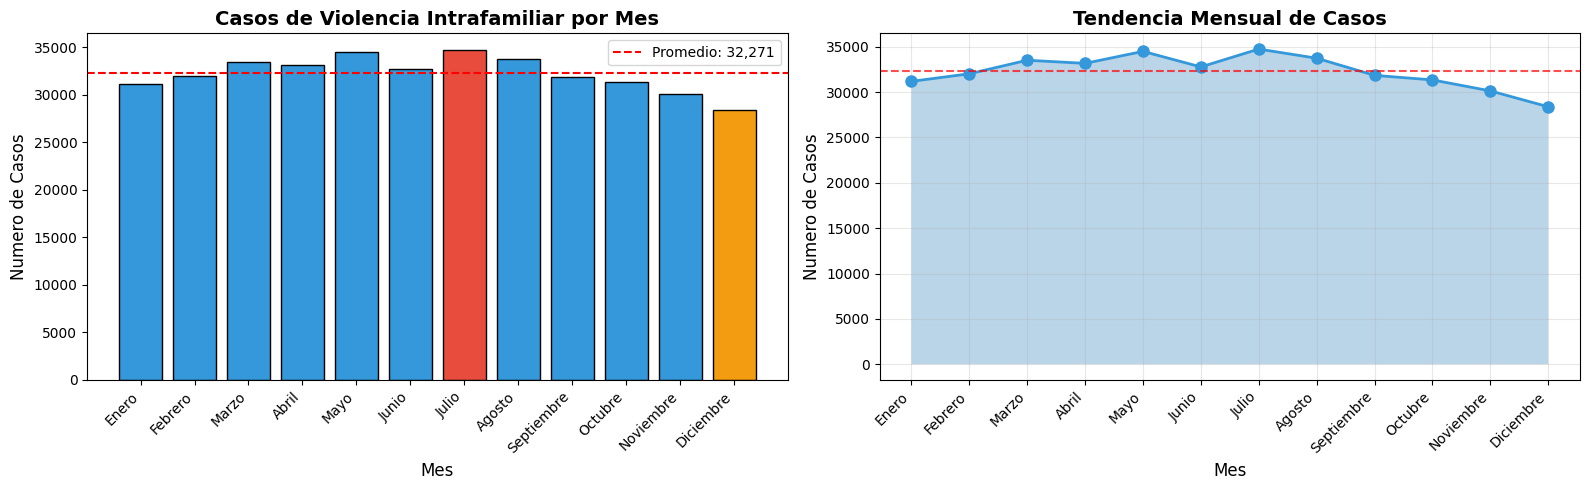

---------------------------------------------------------------------------
VALIDACION DE LA HIPOTESIS:
---------------------------------------------------------------------------

Datos encontrados:
- Promedio mensual: 32,271 casos
- Mes con MAS casos: Julio (34,735 casos)
- Mes con MENOS casos: Diciembre (28,378 casos)
- Variacion entre maximo y minimo: 19.7% respecto al promedio

CONCLUSION:

HIPOTESIS PARCIALMENTE REFUTADA: Aunque hay variaciones mensuales,
la diferencia no es tan marcada como se esperaba.
Los casos se distribuyen de manera relativamente uniforme durante el anio.


In [20]:
# PREGUNTA DE INVESTIGACION 4
# ============================================================================
# HIPOTESIS 4: Existen meses del anio con mas casos de violencia intrafamiliar
# ============================================================================

print("="*75)
print("PREGUNTA 4: Hay meses con mas casos de violencia intrafamiliar?")
print("="*75)

print("""
SUPUESTO INICIAL:
Se cree que existen patrones temporales en la violencia intrafamiliar, con 
posibles aumentos en meses de festividades (diciembre, fiestas patrias) o 
periodos de estres economico, debido al consumo de alcohol y tensiones familiares.
""")

# Usar MES_EMISION o HEC_MES
mes_col = 'MES_EMISION' if 'MES_EMISION' in data.columns else 'HEC_MES'

if mes_col in data.columns:
    # Analisis: Casos por mes
    casos_por_mes = data[mes_col].value_counts().sort_index()
    
    # Nombres de meses
    meses_nombres = {1.0: 'Enero', 2.0: 'Febrero', 3.0: 'Marzo', 4.0: 'Abril',
                     5.0: 'Mayo', 6.0: 'Junio', 7.0: 'Julio', 8.0: 'Agosto',
                     9.0: 'Septiembre', 10.0: 'Octubre', 11.0: 'Noviembre', 12.0: 'Diciembre'}
    
    # Crear tabla
    mes_df = pd.DataFrame({
        'Mes': casos_por_mes.index.map(meses_nombres),
        'Casos': casos_por_mes.values,
        'Porcentaje': (casos_por_mes.values / casos_por_mes.sum() * 100).round(2)
    })
    
    print("Distribucion de casos por mes:")
    display(mes_df)
    
    # Estadisticas
    promedio_mensual = casos_por_mes.mean()
    mes_max = casos_por_mes.idxmax()
    mes_min = casos_por_mes.idxmin()
    casos_max = casos_por_mes.max()
    casos_min = casos_por_mes.min()
    variacion = ((casos_max - casos_min) / promedio_mensual * 100)
    
    # Visualizacion
    fig, axes = plt.subplots(1, 2, figsize=(16, 5))
    
    # Grafico de barras
    ax1 = axes[0]
    meses_orden = [meses_nombres[i] for i in sorted(casos_por_mes.index)]
    valores_orden = [casos_por_mes[i] for i in sorted(casos_por_mes.index)]
    colores = ['#e74c3c' if v == casos_max else '#f39c12' if v == casos_min else '#3498db' 
               for v in valores_orden]
    
    ax1.bar(meses_orden, valores_orden, color=colores, edgecolor='black')
    ax1.axhline(y=promedio_mensual, color='red', linestyle='--', label=f'Promedio: {promedio_mensual:,.0f}')
    ax1.set_xlabel('Mes', fontsize=12)
    ax1.set_ylabel('Numero de Casos', fontsize=12)
    ax1.set_title('Casos de Violencia Intrafamiliar por Mes', fontsize=14, fontweight='bold')
    ax1.legend()
    plt.setp(ax1.xaxis.get_majorticklabels(), rotation=45, ha='right')
    
    # Grafico de linea (patron circular)
    ax2 = axes[1]
    ax2.plot(meses_orden, valores_orden, marker='o', linewidth=2, markersize=8, color='#3498db')
    ax2.fill_between(meses_orden, valores_orden, alpha=0.3)
    ax2.axhline(y=promedio_mensual, color='red', linestyle='--', alpha=0.7)
    ax2.set_xlabel('Mes', fontsize=12)
    ax2.set_ylabel('Numero de Casos', fontsize=12)
    ax2.set_title('Tendencia Mensual de Casos', fontsize=14, fontweight='bold')
    plt.setp(ax2.xaxis.get_majorticklabels(), rotation=45, ha='right')
    ax2.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Conclusion
    print("-"*75)
    print("VALIDACION DE LA HIPOTESIS:")
    print("-"*75)
    print(f"""
Datos encontrados:
- Promedio mensual: {promedio_mensual:,.0f} casos
- Mes con MAS casos: {meses_nombres[mes_max]} ({casos_max:,} casos)
- Mes con MENOS casos: {meses_nombres[mes_min]} ({casos_min:,} casos)
- Variacion entre maximo y minimo: {variacion:.1f}% respecto al promedio

CONCLUSION:
""")
    
    if variacion > 20:
        print("HIPOTESIS CONFIRMADA: Existe un patron temporal marcado.")
        print(f"El mes de {meses_nombres[mes_max]} tiene significativamente mas casos.")
        if mes_max in [12.0, 9.0]:
            print("Esto coincide con festividades (diciembre) o fiestas patrias (septiembre).")
    else:
        print("HIPOTESIS PARCIALMENTE REFUTADA: Aunque hay variaciones mensuales,")
        print("la diferencia no es tan marcada como se esperaba.")
        print("Los casos se distribuyen de manera relativamente uniforme durante el anio.")

else:
    print("No se encontro variable de mes en el dataset.")

print("="*75)

PREGUNTA 5: Las mujeres que no trabajan son mas vulnerables?

SUPUESTO INICIAL:
Se cree que las mujeres que no trabajan (amas de casa) son mas vulnerables 
a la violencia intrafamiliar debido a su dependencia economica del agresor,
lo que dificulta que puedan abandonar la situacion de violencia.

Condicion laboral de MUJERES victimas (n=347,110):
Condicion laboral de MUJERES victimas (n=347,110):


,Codigo,Condicion,Casos,Porcentaje
0,1.0,Si trabaja,91949,26.52
1,2.0,No trabaja,253152,73.01
2,9.0,Ignorado,1621,0.47


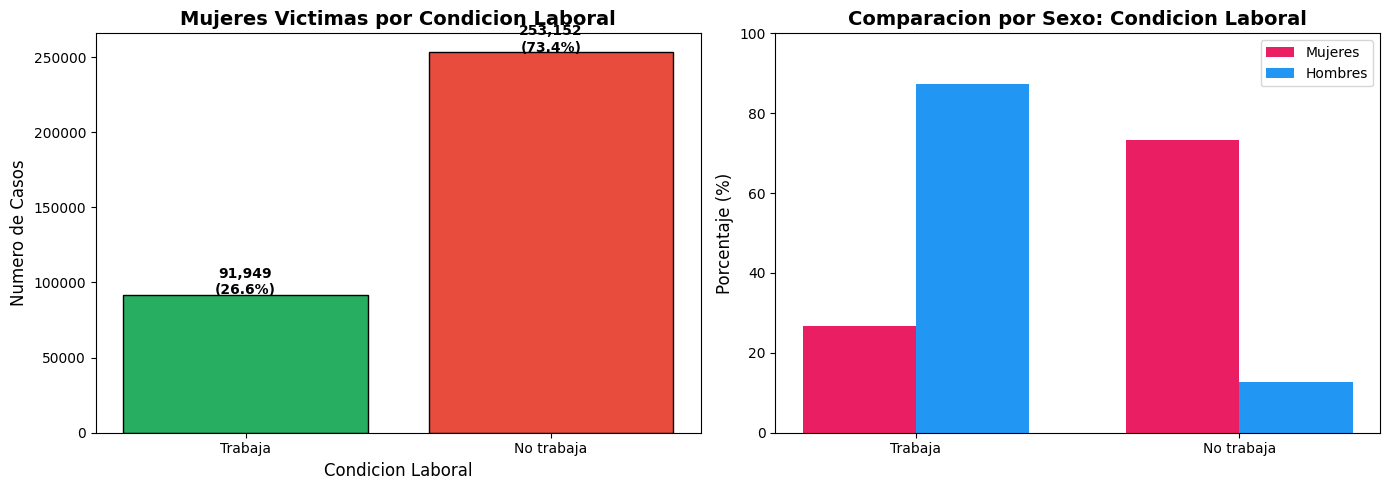

---------------------------------------------------------------------------
VALIDACION DE LA HIPOTESIS:
---------------------------------------------------------------------------

Datos encontrados (solo mujeres victimas):
- Mujeres que SI trabajan: 91,949 (26.6%)
- Mujeres que NO trabajan: 253,152 (73.4%)

Comparacion con hombres victimas:
- Hombres que no trabajan: 12.8%

CONCLUSION:

HIPOTESIS CONFIRMADA: La mayoria de las mujeres victimas NO trabajan
(73.4%), lo que sugiere que la dependencia economica
puede ser un factor de vulnerabilidad importante.
Esto refuerza la teoria de que la independencia economica puede ser
un factor protector contra la violencia intrafamiliar.


In [21]:
# PREGUNTA DE INVESTIGACION 5
# ============================================================================
# HIPOTESIS 5: Las mujeres que no trabajan son mas vulnerables a la violencia
# ============================================================================

print("="*75)
print("PREGUNTA 5: Las mujeres que no trabajan son mas vulnerables?")
print("="*75)

print("""
SUPUESTO INICIAL:
Se cree que las mujeres que no trabajan (amas de casa) son mas vulnerables 
a la violencia intrafamiliar debido a su dependencia economica del agresor,
lo que dificulta que puedan abandonar la situacion de violencia.
""")

if 'VIC_TRABAJA' in data.columns and 'VIC_SEXO' in data.columns:
    # Filtrar solo mujeres
    mujeres = data[data['VIC_SEXO'] == 2.0]
    total_mujeres = len(mujeres)
    
    # Analisis: Condicion laboral de mujeres victimas
    trabajo_mujeres = mujeres['VIC_TRABAJA'].value_counts().sort_index()
    
    # Etiquetas para trabajo
    trabajo_etiquetas = {1.0: 'Si trabaja', 2.0: 'No trabaja', 9.0: 'Ignorado'}
    
    # Crear tabla
    trabajo_df = pd.DataFrame({
        'Codigo': trabajo_mujeres.index,
        'Condicion': trabajo_mujeres.index.map(trabajo_etiquetas),
        'Casos': trabajo_mujeres.values,
        'Porcentaje': (trabajo_mujeres.values / trabajo_mujeres.sum() * 100).round(2)
    })
    
    print(f"Condicion laboral de MUJERES victimas (n={total_mujeres:,}):")
    display(trabajo_df)
    
    # Valores
    trabajan = trabajo_mujeres.get(1.0, 0)
    no_trabajan = trabajo_mujeres.get(2.0, 0)
    total_conocido = trabajan + no_trabajan
    pct_trabajan = (trabajan / total_conocido * 100) if total_conocido > 0 else 0
    pct_no_trabajan = (no_trabajan / total_conocido * 100) if total_conocido > 0 else 0
    
    # Comparar con hombres
    hombres = data[data['VIC_SEXO'] == 1.0]
    trabajo_hombres = hombres['VIC_TRABAJA'].value_counts().sort_index()
    hombres_trabajan = trabajo_hombres.get(1.0, 0)
    hombres_no_trabajan = trabajo_hombres.get(2.0, 0)
    total_hombres_conocido = hombres_trabajan + hombres_no_trabajan
    pct_hombres_no_trabajan = (hombres_no_trabajan / total_hombres_conocido * 100) if total_hombres_conocido > 0 else 0
    
    # Visualizacion
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    
    # Grafico de mujeres
    ax1 = axes[0]
    condiciones = ['Trabaja', 'No trabaja']
    valores_mujeres = [trabajan, no_trabajan]
    colores = ['#27ae60', '#e74c3c']
    ax1.bar(condiciones, valores_mujeres, color=colores, edgecolor='black')
    ax1.set_xlabel('Condicion Laboral', fontsize=12)
    ax1.set_ylabel('Numero de Casos', fontsize=12)
    ax1.set_title('Mujeres Victimas por Condicion Laboral', fontsize=14, fontweight='bold')
    for i, v in enumerate(valores_mujeres):
        ax1.text(i, v + 500, f'{v:,}\n({[pct_trabajan, pct_no_trabajan][i]:.1f}%)', 
                ha='center', fontsize=10, fontweight='bold')
    
    # Comparacion hombres vs mujeres
    ax2 = axes[1]
    x = np.arange(2)
    width = 0.35
    
    pcts_mujeres = [pct_trabajan, pct_no_trabajan]
    pcts_hombres = [(hombres_trabajan/total_hombres_conocido*100) if total_hombres_conocido > 0 else 0,
                    pct_hombres_no_trabajan]
    
    ax2.bar(x - width/2, pcts_mujeres, width, label='Mujeres', color='#e91e63')
    ax2.bar(x + width/2, pcts_hombres, width, label='Hombres', color='#2196f3')
    ax2.set_ylabel('Porcentaje (%)', fontsize=12)
    ax2.set_title('Comparacion por Sexo: Condicion Laboral', fontsize=14, fontweight='bold')
    ax2.set_xticks(x)
    ax2.set_xticklabels(['Trabaja', 'No trabaja'])
    ax2.legend()
    ax2.set_ylim(0, 100)
    
    plt.tight_layout()
    plt.show()
    
    # Conclusion
    print("-"*75)
    print("VALIDACION DE LA HIPOTESIS:")
    print("-"*75)
    print(f"""
Datos encontrados (solo mujeres victimas):
- Mujeres que SI trabajan: {trabajan:,} ({pct_trabajan:.1f}%)
- Mujeres que NO trabajan: {no_trabajan:,} ({pct_no_trabajan:.1f}%)

Comparacion con hombres victimas:
- Hombres que no trabajan: {pct_hombres_no_trabajan:.1f}%

CONCLUSION:
""")
    
    if pct_no_trabajan > 60:
        print("HIPOTESIS CONFIRMADA: La mayoria de las mujeres victimas NO trabajan")
        print(f"({pct_no_trabajan:.1f}%), lo que sugiere que la dependencia economica")
        print("puede ser un factor de vulnerabilidad importante.")
        print("Esto refuerza la teoria de que la independencia economica puede ser")
        print("un factor protector contra la violencia intrafamiliar.")
    elif pct_no_trabajan > pct_trabajan:
        print("HIPOTESIS PARCIALMENTE CONFIRMADA: Hay mas mujeres victimas que no")
        print(f"trabajan ({pct_no_trabajan:.1f}%) que las que si trabajan ({pct_trabajan:.1f}%),")
        print("aunque la diferencia no es tan marcada como se esperaba.")
    else:
        print("HIPOTESIS REFUTADA: Contrario a lo esperado, hay mas mujeres victimas")
        print(f"que SI trabajan ({pct_trabajan:.1f}%).")
        print("Esto sugiere que trabajar no necesariamente protege de la violencia.")

else:
    print("Variables necesarias no disponibles en el dataset.")

print("="*75)

## 1e) Graficos Exploratorios

En esta seccion se presentan graficos exploratorios que permiten visualizar el estado general de los datos y detectar patrones, tendencias y posibles anomalias en el dataset de violencia intrafamiliar.

GRAFICO 1: EVOLUCION TEMPORAL DE CASOS DE VIOLENCIA INTRAFAMILIAR


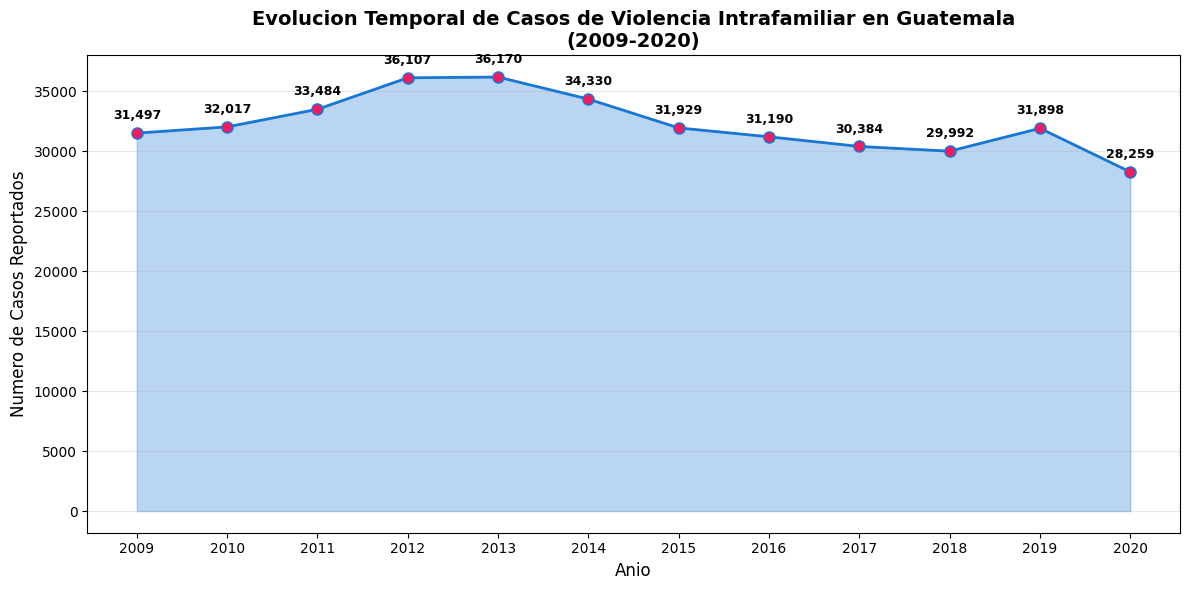


RESUMEN:
- Anio con mas casos: 2013 (36,170 casos)
- Anio con menos casos: 2020 (28,259 casos)
- Variacion 2009-2020: -10.3%


In [22]:
# GRAFICO 1: EVOLUCION TEMPORAL DE CASOS (2009-2020)
# Este grafico muestra la tendencia de casos reportados a lo largo de los años

print("="*75)
print("GRAFICO 1: EVOLUCION TEMPORAL DE CASOS DE VIOLENCIA INTRAFAMILIAR")
print("="*75)

# Convertir __source_year a numerico para ordenar correctamente
data['anio_num'] = pd.to_numeric(data['__source_year'], errors='coerce')
casos_por_anio = data.groupby('anio_num').size().sort_index()

fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(casos_por_anio.index, casos_por_anio.values, marker='o', linewidth=2, 
        markersize=8, color='#1976d2', markerfacecolor='#e91e63')
ax.fill_between(casos_por_anio.index, casos_por_anio.values, alpha=0.3, color='#1976d2')

# Anotaciones en cada punto
for x, y in zip(casos_por_anio.index, casos_por_anio.values):
    ax.annotate(f'{y:,}', (x, y), textcoords="offset points", xytext=(0,10), 
                ha='center', fontsize=9, fontweight='bold')

ax.set_xlabel('Anio', fontsize=12)
ax.set_ylabel('Numero de Casos Reportados', fontsize=12)
ax.set_title('Evolucion Temporal de Casos de Violencia Intrafamiliar en Guatemala\n(2009-2020)', 
             fontsize=14, fontweight='bold')
ax.set_xticks(casos_por_anio.index)
ax.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# Analisis de tendencia
print(f"\nRESUMEN:")
print(f"- Anio con mas casos: {casos_por_anio.idxmax()} ({casos_por_anio.max():,} casos)")
print(f"- Anio con menos casos: {casos_por_anio.idxmin()} ({casos_por_anio.min():,} casos)")
variacion = ((casos_por_anio.iloc[-1] - casos_por_anio.iloc[0]) / casos_por_anio.iloc[0]) * 100
print(f"- Variacion 2009-2020: {variacion:+.1f}%")

GRAFICO 2: DISTRIBUCION MENSUAL DE CASOS


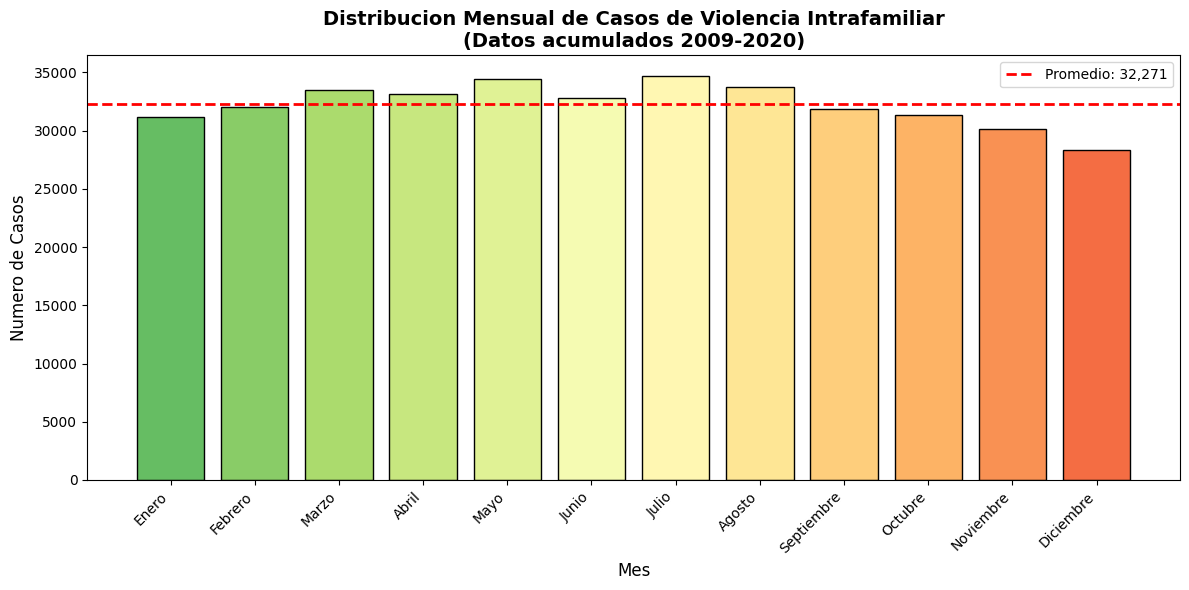


RESUMEN:
- Mes con mas casos: Julio (34,735 casos)
- Mes con menos casos: Diciembre (28,378 casos)
- Promedio mensual: 32,271 casos


In [23]:
# GRAFICO 2: DISTRIBUCION MENSUAL DE CASOS
# Este grafico permite identificar si hay estacionalidad en los reportes de violencia

print("="*75)
print("GRAFICO 2: DISTRIBUCION MENSUAL DE CASOS")
print("="*75)

if 'MES_EMISION' in data.columns:
    meses = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio',
             'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']
    
    casos_por_mes = data['MES_EMISION'].value_counts().sort_index()
    
    fig, ax = plt.subplots(figsize=(12, 6))
    colores = plt.cm.RdYlGn_r(np.linspace(0.2, 0.8, 12))
    bars = ax.bar(range(1, 13), [casos_por_mes.get(i, 0) for i in range(1, 13)], 
                  color=colores, edgecolor='black')
    
    ax.set_xlabel('Mes', fontsize=12)
    ax.set_ylabel('Numero de Casos', fontsize=12)
    ax.set_title('Distribucion Mensual de Casos de Violencia Intrafamiliar\n(Datos acumulados 2009-2020)', 
                 fontsize=14, fontweight='bold')
    ax.set_xticks(range(1, 13))
    ax.set_xticklabels(meses, rotation=45, ha='right')
    
    # Linea de promedio
    promedio = casos_por_mes.mean()
    ax.axhline(y=promedio, color='red', linestyle='--', linewidth=2, label=f'Promedio: {promedio:,.0f}')
    ax.legend()
    
    plt.tight_layout()
    plt.show()
    
    # Identificar patrones
    mes_max = casos_por_mes.idxmax()
    mes_min = casos_por_mes.idxmin()
    print(f"\nRESUMEN:")
    print(f"- Mes con mas casos: {meses[int(mes_max)-1]} ({casos_por_mes.max():,} casos)")
    print(f"- Mes con menos casos: {meses[int(mes_min)-1]} ({casos_por_mes.min():,} casos)")
    print(f"- Promedio mensual: {promedio:,.0f} casos")
else:
    print("Variable MES_EMISION no disponible en el dataset.")

GRAFICO 3: PIRAMIDE POBLACIONAL DE VICTIMAS POR SEXO Y EDAD


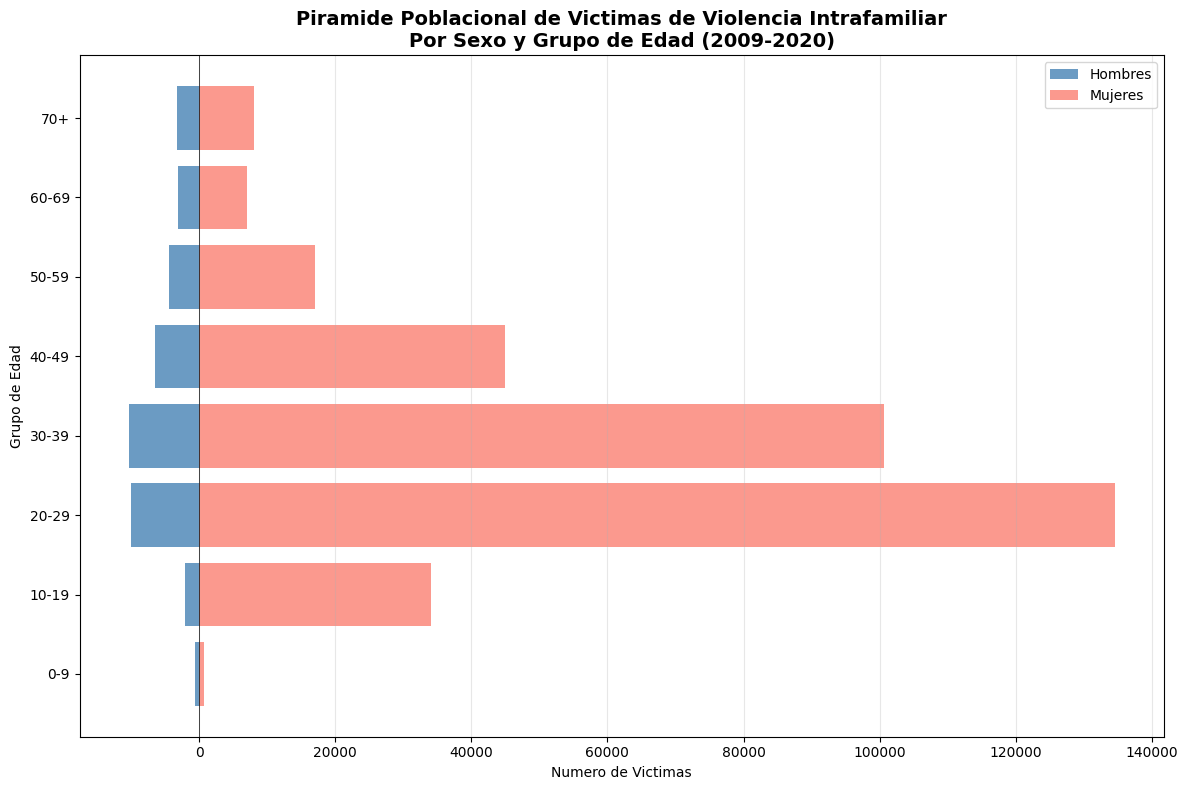


Distribucion por grupo de edad y sexo:
--------------------------------------------------
Grupo Edad      Hombres    Mujeres      Total    % Mujeres
--------------------------------------------------
0-9                 581        682      1,263        54.0%
10-19             2,094     34,042     36,136        94.2%
20-29            10,057    134,530    144,587        93.0%
30-39            10,310    100,610    110,920        90.7%
40-49             6,430     44,940     51,370        87.5%
50-59             4,401     17,092     21,493        79.5%
60-69             3,096      7,087     10,183        69.6%
70+               3,178      8,127     11,305        71.9%
--------------------------------------------------
TOTAL            40,147    347,110    387,257        89.6%


In [24]:
# Grafico 3: Piramide poblacional por sexo de la victima y grupos de edad
# Este grafico permite visualizar la distribucion demografica de las victimas

print("=" * 80)
print("GRAFICO 3: PIRAMIDE POBLACIONAL DE VICTIMAS POR SEXO Y EDAD")
print("=" * 80)

# Crear grupos de edad para la piramide
def crear_grupo_edad(edad):
    if pd.isna(edad) or edad < 0:
        return None
    elif edad < 10:
        return '0-9'
    elif edad < 20:
        return '10-19'
    elif edad < 30:
        return '20-29'
    elif edad < 40:
        return '30-39'
    elif edad < 50:
        return '40-49'
    elif edad < 60:
        return '50-59'
    elif edad < 70:
        return '60-69'
    else:
        return '70+'

data['grupo_edad'] = data['VIC_EDAD'].apply(crear_grupo_edad)

# Filtrar datos validos
piramide_data = data[data['grupo_edad'].notna() & data['VIC_SEXO'].isin([1, 2])].copy()

# Contar por grupo de edad y sexo
hombres = piramide_data[piramide_data['VIC_SEXO'] == 1].groupby('grupo_edad').size()
mujeres = piramide_data[piramide_data['VIC_SEXO'] == 2].groupby('grupo_edad').size()

grupos_orden = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70+']
hombres = hombres.reindex(grupos_orden, fill_value=0)
mujeres = mujeres.reindex(grupos_orden, fill_value=0)

fig, ax = plt.subplots(figsize=(12, 8))

y_pos = np.arange(len(grupos_orden))

# Barras para hombres (izquierda, valores negativos)
ax.barh(y_pos, -hombres.values, height=0.8, color='steelblue', label='Hombres', alpha=0.8)
# Barras para mujeres (derecha, valores positivos)
ax.barh(y_pos, mujeres.values, height=0.8, color='salmon', label='Mujeres', alpha=0.8)

ax.set_yticks(y_pos)
ax.set_yticklabels(grupos_orden)
ax.set_ylabel('Grupo de Edad')
ax.set_xlabel('Numero de Victimas')
ax.set_title('Piramide Poblacional de Victimas de Violencia Intrafamiliar\nPor Sexo y Grupo de Edad (2009-2020)', fontsize=14, fontweight='bold')

# Ajustar etiquetas del eje X para mostrar valores absolutos
max_val = max(hombres.max(), mujeres.max())
ticks = ax.get_xticks()
ax.set_xticklabels([str(abs(int(x))) for x in ticks])

ax.legend(loc='upper right')
ax.axvline(x=0, color='black', linewidth=0.5)
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

# Estadisticas
print("\nDistribucion por grupo de edad y sexo:")
print("-" * 50)
print(f"{'Grupo Edad':<12} {'Hombres':>10} {'Mujeres':>10} {'Total':>10} {'% Mujeres':>12}")
print("-" * 50)
for grupo in grupos_orden:
    h = hombres[grupo]
    m = mujeres[grupo]
    total = h + m
    pct_m = (m / total * 100) if total > 0 else 0
    print(f"{grupo:<12} {h:>10,} {m:>10,} {total:>10,} {pct_m:>11.1f}%")

total_h = hombres.sum()
total_m = mujeres.sum()
print("-" * 50)
print(f"{'TOTAL':<12} {total_h:>10,} {total_m:>10,} {total_h + total_m:>10,} {total_m/(total_h+total_m)*100:>11.1f}%")

GRAFICO 4: HEATMAP - RELACION VICTIMA-AGRESOR POR SEXO DEL AGRESOR


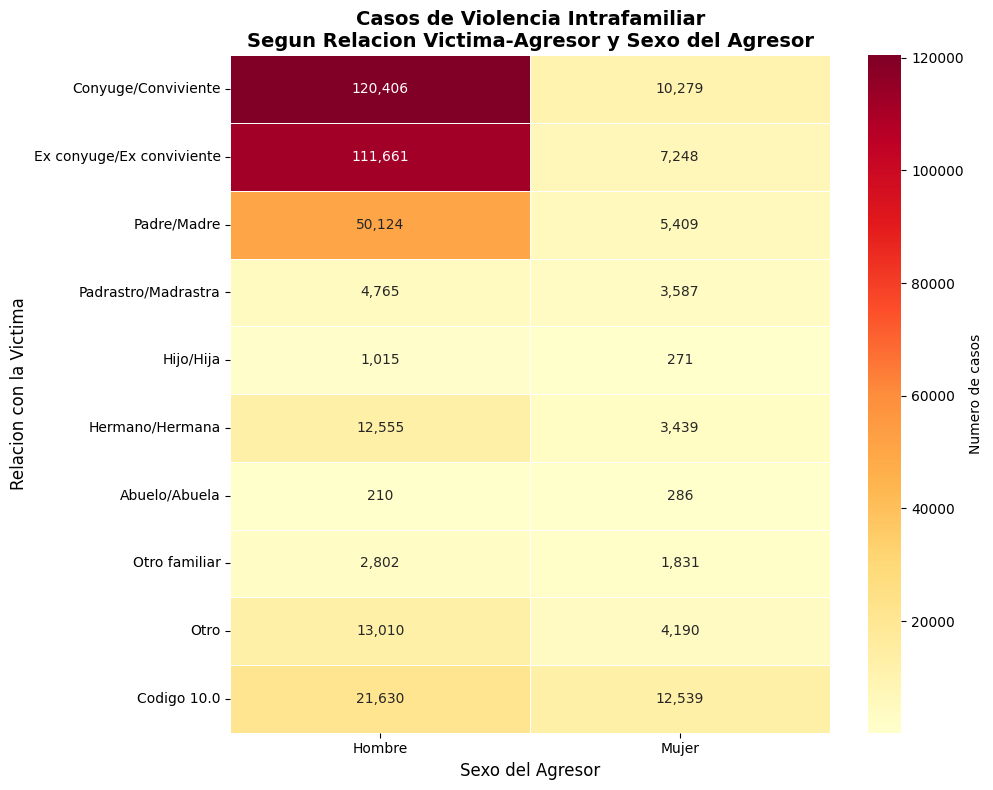


Porcentaje de agresores hombres por tipo de relacion:
------------------------------------------------------------
Conyuge/Conviviente      :  120,406 ( 92.1%) hombres,   10,279 (  7.9%) mujeres
Ex conyuge/Ex conviviente:  111,661 ( 93.9%) hombres,    7,248 (  6.1%) mujeres
Padre/Madre              :   50,124 ( 90.3%) hombres,    5,409 (  9.7%) mujeres
Padrastro/Madrastra      :    4,765 ( 57.1%) hombres,    3,587 ( 42.9%) mujeres
Hijo/Hija                :    1,015 ( 78.9%) hombres,      271 ( 21.1%) mujeres
Hermano/Hermana          :   12,555 ( 78.5%) hombres,    3,439 ( 21.5%) mujeres
Abuelo/Abuela            :      210 ( 42.3%) hombres,      286 ( 57.7%) mujeres
Otro familiar            :    2,802 ( 60.5%) hombres,    1,831 ( 39.5%) mujeres
Otro                     :   13,010 ( 75.6%) hombres,    4,190 ( 24.4%) mujeres
Codigo 10.0              :   21,630 ( 63.3%) hombres,   12,539 ( 36.7%) mujeres


In [25]:
# Grafico 4: Heatmap de relacion victima-agresor segun sexo del agresor
# Visualiza patrones de violencia segun el tipo de relacion y sexo

print("=" * 80)
print("GRAFICO 4: HEATMAP - RELACION VICTIMA-AGRESOR POR SEXO DEL AGRESOR")
print("=" * 80)

# Crear tabla cruzada
heatmap_data = pd.crosstab(data['VIC_REL_AGR'], data['AGR_SEXO'])

# Aplicar etiquetas
etiquetas_relacion = {
    1: 'Conyuge/Conviviente',
    2: 'Ex conyuge/Ex conviviente',
    3: 'Padre/Madre',
    4: 'Padrastro/Madrastra',
    5: 'Hijo/Hija',
    6: 'Hermano/Hermana',
    7: 'Abuelo/Abuela',
    8: 'Otro familiar',
    9: 'Otro'
}

etiquetas_sexo_agr = {1: 'Hombre', 2: 'Mujer'}

# Renombrar indices y columnas
heatmap_data.index = heatmap_data.index.map(lambda x: etiquetas_relacion.get(x, f'Codigo {x}'))
heatmap_data.columns = heatmap_data.columns.map(lambda x: etiquetas_sexo_agr.get(x, f'Codigo {x}'))

# Mantener solo columnas validas
columnas_validas = [col for col in ['Hombre', 'Mujer'] if col in heatmap_data.columns]
heatmap_data = heatmap_data[columnas_validas]

fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(heatmap_data, annot=True, fmt=',d', cmap='YlOrRd', 
            linewidths=0.5, ax=ax, cbar_kws={'label': 'Numero de casos'})
ax.set_title('Casos de Violencia Intrafamiliar\nSegun Relacion Victima-Agresor y Sexo del Agresor', 
             fontsize=14, fontweight='bold')
ax.set_xlabel('Sexo del Agresor', fontsize=12)
ax.set_ylabel('Relacion con la Victima', fontsize=12)
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Mostrar porcentajes
print("\nPorcentaje de agresores hombres por tipo de relacion:")
print("-" * 60)
if 'Hombre' in heatmap_data.columns and 'Mujer' in heatmap_data.columns:
    for relacion in heatmap_data.index:
        h = heatmap_data.loc[relacion, 'Hombre']
        m = heatmap_data.loc[relacion, 'Mujer']
        total = h + m
        if total > 0:
            print(f"{relacion:<25}: {h:>8,} ({h/total*100:>5.1f}%) hombres, {m:>8,} ({m/total*100:>5.1f}%) mujeres")

GRAFICO 5: DISTRIBUCION GEOGRAFICA - AREA URBANA VS RURAL


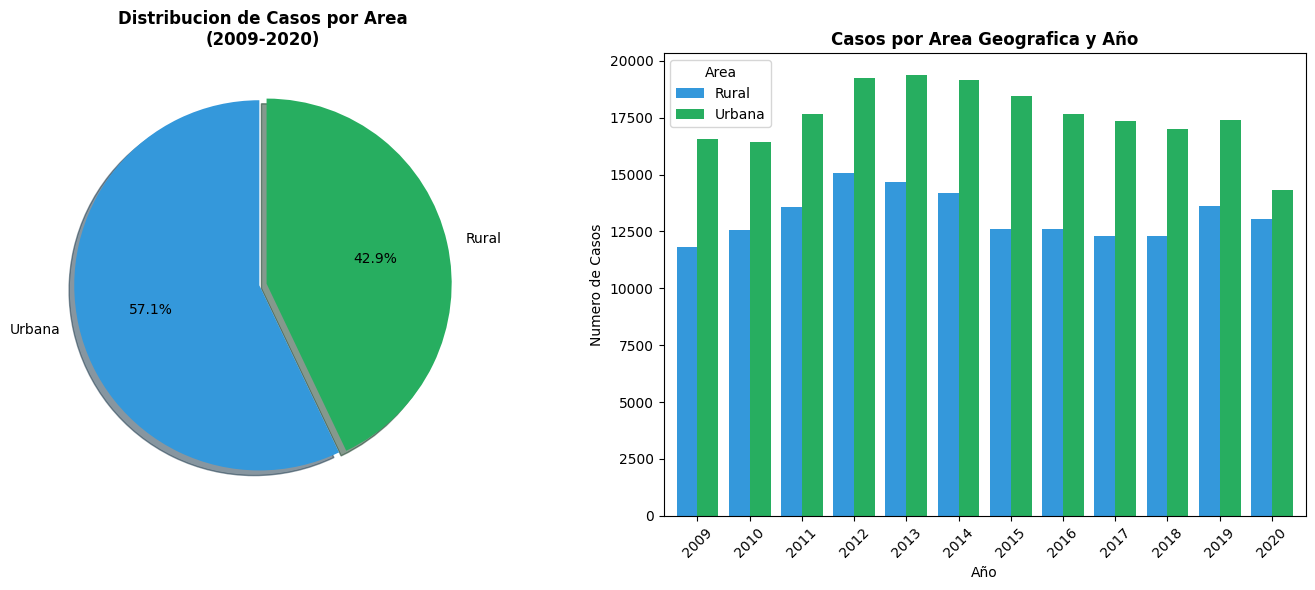


Distribucion por area geografica:
----------------------------------------
Urbana    :    210,589 casos ( 57.1%)
Rural     :    158,325 casos ( 42.9%)
----------------------------------------
Total     :    368,914 casos

Ratio Urbano/Rural: 1.33
Por cada caso en area rural, hay 1.3 casos en area urbana


In [26]:
# Grafico 5: Distribucion geografica - Area urbana vs rural
# Analiza donde ocurren los casos de violencia intrafamiliar

print("=" * 80)
print("GRAFICO 5: DISTRIBUCION GEOGRAFICA - AREA URBANA VS RURAL")
print("=" * 80)

# Verificar si existe la columna HEC_AREA
if 'HEC_AREA' in data.columns:
    area_data = data['HEC_AREA'].value_counts()
    
    etiquetas_area = {1: 'Urbana', 2: 'Rural'}
    area_data.index = area_data.index.map(lambda x: etiquetas_area.get(x, f'Codigo {x}'))
    
    # Filtrar solo Urbana y Rural
    area_valida = area_data[area_data.index.isin(['Urbana', 'Rural'])]
    
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))
    
    # Grafico de pastel
    colors = ['#3498db', '#27ae60']
    explode = (0.02, 0.02)
    axes[0].pie(area_valida.values, labels=area_valida.index, autopct='%1.1f%%',
                colors=colors, explode=explode, startangle=90, shadow=True)
    axes[0].set_title('Distribucion de Casos por Area\n(2009-2020)', fontsize=12, fontweight='bold')
    
    # Grafico de barras por año
    area_por_anio = data[data['HEC_AREA'].isin([1, 2])].copy()
    area_por_anio['area_label'] = area_por_anio['HEC_AREA'].map(etiquetas_area)
    
    pivot_area = area_por_anio.groupby(['__source_year', 'area_label']).size().unstack(fill_value=0)
    
    pivot_area.plot(kind='bar', ax=axes[1], color=colors, width=0.8)
    axes[1].set_title('Casos por Area Geografica y Año', fontsize=12, fontweight='bold')
    axes[1].set_xlabel('Año')
    axes[1].set_ylabel('Numero de Casos')
    axes[1].legend(title='Area')
    axes[1].tick_params(axis='x', rotation=45)
    
    plt.tight_layout()
    plt.show()
    
    # Estadisticas
    print("\nDistribucion por area geografica:")
    print("-" * 40)
    total_area = area_valida.sum()
    for area, count in area_valida.items():
        print(f"{area:<10}: {count:>10,} casos ({count/total_area*100:>5.1f}%)")
    print("-" * 40)
    print(f"{'Total':<10}: {total_area:>10,} casos")
    
    # Ratio urbano/rural
    if 'Urbana' in area_valida.index and 'Rural' in area_valida.index:
        ratio = area_valida['Urbana'] / area_valida['Rural']
        print(f"\nRatio Urbano/Rural: {ratio:.2f}")
        print(f"Por cada caso en area rural, hay {ratio:.1f} casos en area urbana")
else:
    print("La variable HEC_AREA no esta disponible en el dataset.")
    print("Variables disponibles relacionadas con ubicacion:")
    cols_ubicacion = [col for col in data.columns if 'DEPTO' in col or 'MUNI' in col or 'AREA' in col]
    print(cols_ubicacion if cols_ubicacion else "No se encontraron variables de ubicacion")

GRAFICO 6: DISTRIBUCION DE EDAD DE VICTIMAS POR TIPO DE RELACION


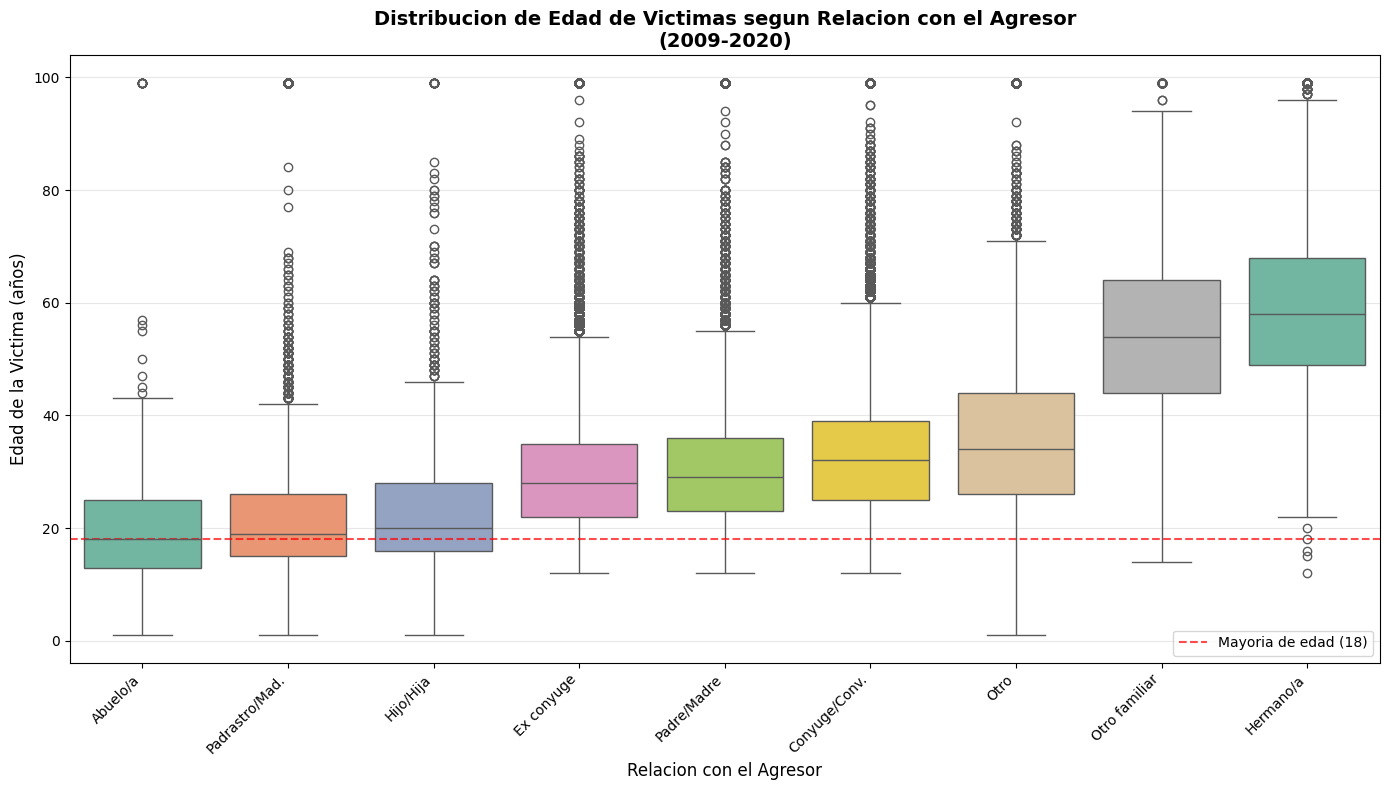


Estadisticas de edad por tipo de relacion:
--------------------------------------------------------------------------------
Relacion                  N    Media  Mediana    Min    Max   Desv.Est
--------------------------------------------------------------------------------
Abuelo/a                496     20.9     18.0      1     99      14.87
Padrastro/Mad.        8,352     22.0     19.0      1     99      14.29
Hijo/Hija             1,286     24.4     20.0      1     99      15.36
Ex conyuge          118,909     30.1     28.0     12     99      12.18
Padre/Madre          55,533     31.1     29.0     12     99      11.93
Conyuge/Conv.       130,685     33.7     32.0     12     99      12.32
Otro                 17,200     36.4     34.0      1     99      14.57
Otro familiar         4,633     54.4     54.0     14     99      14.38
Hermano/a            15,994     58.7     58.0     12     99      13.60

Victimas menores de edad (< 18 años) por tipo de relacion:
------------------------

In [27]:
# Grafico 6: Boxplot de edad de victimas segun tipo de relacion con el agresor
# Permite identificar patrones de edad segun el tipo de violencia

print("=" * 80)
print("GRAFICO 6: DISTRIBUCION DE EDAD DE VICTIMAS POR TIPO DE RELACION")
print("=" * 80)

etiquetas_relacion = {
    1: 'Conyuge/Conv.',
    2: 'Ex conyuge',
    3: 'Padre/Madre',
    4: 'Padrastro/Mad.',
    5: 'Hijo/Hija',
    6: 'Hermano/a',
    7: 'Abuelo/a',
    8: 'Otro familiar',
    9: 'Otro'
}

# Filtrar datos validos
boxplot_data = data[data['VIC_REL_AGR'].isin(etiquetas_relacion.keys()) & 
                    data['VIC_EDAD'].notna() & 
                    (data['VIC_EDAD'] > 0) & 
                    (data['VIC_EDAD'] < 120)].copy()

boxplot_data['relacion_label'] = boxplot_data['VIC_REL_AGR'].map(etiquetas_relacion)

# Ordenar por mediana de edad
orden = boxplot_data.groupby('relacion_label')['VIC_EDAD'].median().sort_values().index

fig, ax = plt.subplots(figsize=(14, 8))

# Crear boxplot
box = sns.boxplot(x='relacion_label', y='VIC_EDAD', data=boxplot_data, 
                  order=orden, palette='Set2', ax=ax)

ax.set_title('Distribucion de Edad de Victimas segun Relacion con el Agresor\n(2009-2020)', 
             fontsize=14, fontweight='bold')
ax.set_xlabel('Relacion con el Agresor', fontsize=12)
ax.set_ylabel('Edad de la Victima (años)', fontsize=12)
plt.xticks(rotation=45, ha='right')
ax.axhline(y=18, color='red', linestyle='--', alpha=0.7, label='Mayoria de edad (18)')
ax.legend()
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# Estadisticas descriptivas
print("\nEstadisticas de edad por tipo de relacion:")
print("-" * 80)
print(f"{'Relacion':<18} {'N':>8} {'Media':>8} {'Mediana':>8} {'Min':>6} {'Max':>6} {'Desv.Est':>10}")
print("-" * 80)

stats = boxplot_data.groupby('relacion_label')['VIC_EDAD'].agg(['count', 'mean', 'median', 'min', 'max', 'std'])
stats = stats.reindex(orden)

for relacion in orden:
    row = stats.loc[relacion]
    print(f"{relacion:<18} {int(row['count']):>8,} {row['mean']:>8.1f} {row['median']:>8.1f} "
          f"{int(row['min']):>6} {int(row['max']):>6} {row['std']:>10.2f}")

# Victimas menores de edad
print("\nVictimas menores de edad (< 18 años) por tipo de relacion:")
print("-" * 60)
menores = boxplot_data[boxplot_data['VIC_EDAD'] < 18].groupby('relacion_label').size()
totales = boxplot_data.groupby('relacion_label').size()
for rel in orden:
    if rel in menores.index:
        pct = menores[rel] / totales[rel] * 100
        print(f"{rel:<18}: {menores[rel]:>6,} menores ({pct:>5.1f}% del total)")

GRAFICO 7: ANALISIS DE CALIDAD DE DATOS - VALORES FALTANTES


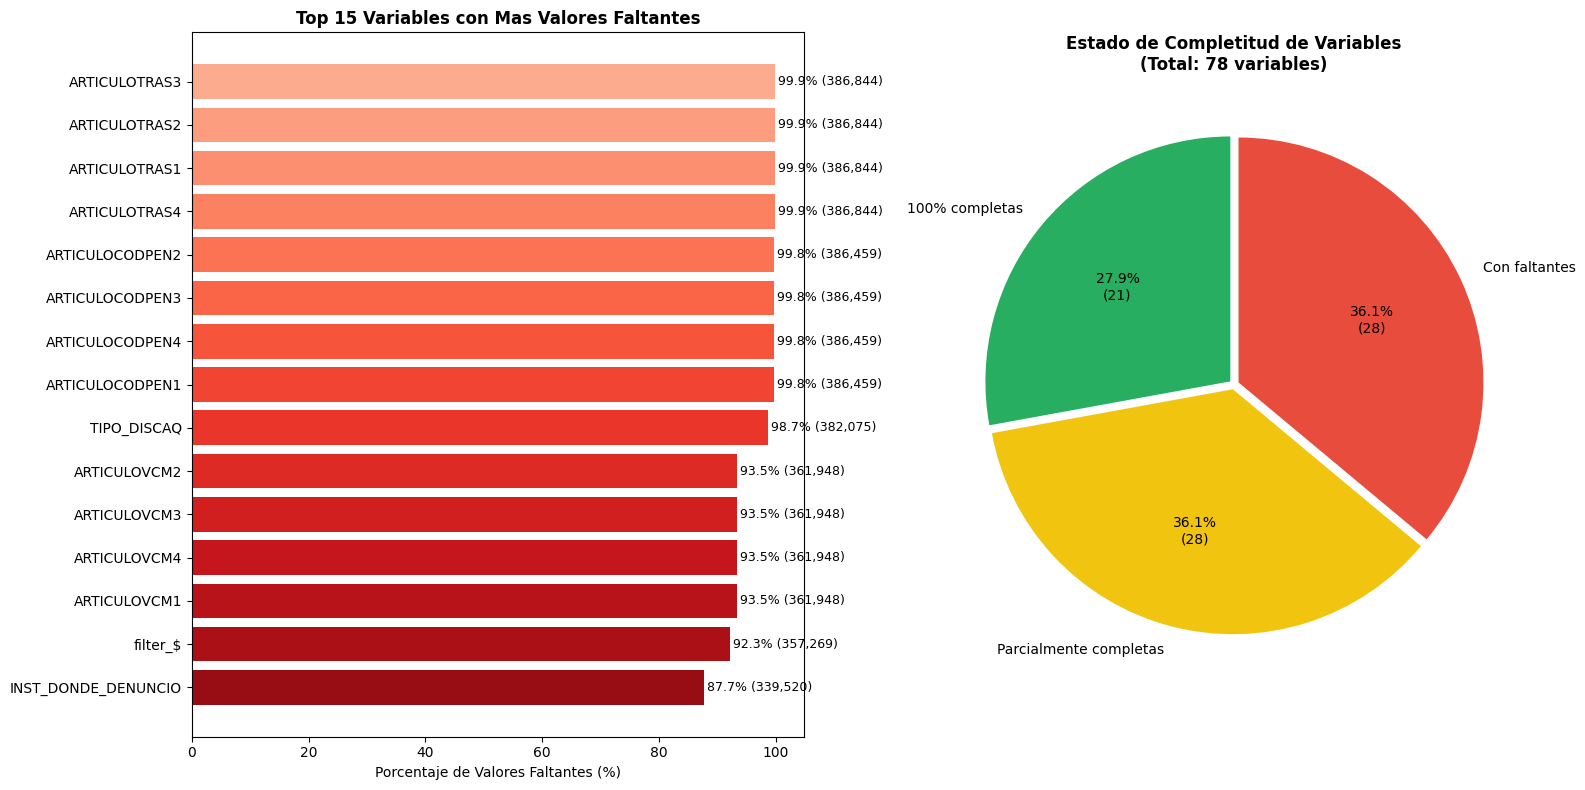


Resumen de calidad de datos:
------------------------------------------------------------
Total de registros: 387,257
Total de variables: 78
Variables completamente llenas: 34
Variables con valores faltantes: 44

Variable con mas valores faltantes:
  - ARTICULOTRAS3: 386,844 faltantes (99.89%)

Completitud promedio del dataset: 65.99%


In [28]:
# Grafico 7: Analisis de calidad de datos - Valores faltantes
# Fundamental para entender el estado de los datos antes de cualquier analisis

print("=" * 80)
print("GRAFICO 7: ANALISIS DE CALIDAD DE DATOS - VALORES FALTANTES")
print("=" * 80)

# Calcular valores faltantes
missing = data.isnull().sum()
missing_pct = (missing / len(data)) * 100

# Crear dataframe con estadisticas de valores faltantes
missing_df = pd.DataFrame({
    'Variable': missing.index,
    'Faltantes': missing.values,
    'Porcentaje': missing_pct.values
}).sort_values('Porcentaje', ascending=False)

# Filtrar solo variables con valores faltantes
missing_df = missing_df[missing_df['Faltantes'] > 0]

fig, axes = plt.subplots(1, 2, figsize=(16, 8))

if len(missing_df) > 0:
    # Top 15 variables con mas valores faltantes
    top_missing = missing_df.head(15)
    
    # Grafico de barras horizontales
    colors = plt.cm.Reds(np.linspace(0.3, 0.9, len(top_missing)))
    bars = axes[0].barh(range(len(top_missing)), top_missing['Porcentaje'].values, color=colors)
    axes[0].set_yticks(range(len(top_missing)))
    axes[0].set_yticklabels(top_missing['Variable'].values)
    axes[0].set_xlabel('Porcentaje de Valores Faltantes (%)')
    axes[0].set_title('Top 15 Variables con Mas Valores Faltantes', fontsize=12, fontweight='bold')
    axes[0].invert_yaxis()
    
    # Agregar etiquetas de porcentaje
    for i, (pct, count) in enumerate(zip(top_missing['Porcentaje'], top_missing['Faltantes'])):
        axes[0].text(pct + 0.5, i, f'{pct:.1f}% ({count:,})', va='center', fontsize=9)
    
    # Grafico de completitud general
    completitud = 100 - missing_pct
    completas = (completitud == 100).sum()
    parciales = ((completitud > 0) & (completitud < 100)).sum()
    
    categorias = ['100% completas', 'Parcialmente completas', 'Con faltantes']
    valores = [completas, parciales, len(missing_df)]
    colors_pie = ['#27ae60', '#f1c40f', '#e74c3c']
    
    axes[1].pie(valores, labels=categorias, autopct=lambda p: f'{p:.1f}%\n({int(p*len(data.columns)/100)})', 
                colors=colors_pie, startangle=90, explode=(0.02, 0.02, 0.02))
    axes[1].set_title(f'Estado de Completitud de Variables\n(Total: {len(data.columns)} variables)', 
                      fontsize=12, fontweight='bold')
else:
    axes[0].text(0.5, 0.5, 'No hay valores faltantes en el dataset', 
                 ha='center', va='center', fontsize=14)
    axes[0].set_xlim(0, 1)
    axes[0].set_ylim(0, 1)
    axes[1].text(0.5, 0.5, 'Todas las variables estan completas', 
                 ha='center', va='center', fontsize=14)
    axes[1].set_xlim(0, 1)
    axes[1].set_ylim(0, 1)

plt.tight_layout()
plt.show()

# Resumen estadistico
print("\nResumen de calidad de datos:")
print("-" * 60)
print(f"Total de registros: {len(data):,}")
print(f"Total de variables: {len(data.columns)}")
print(f"Variables completamente llenas: {(missing == 0).sum()}")
print(f"Variables con valores faltantes: {(missing > 0).sum()}")

if len(missing_df) > 0:
    print(f"\nVariable con mas valores faltantes:")
    top = missing_df.iloc[0]
    print(f"  - {top['Variable']}: {int(top['Faltantes']):,} faltantes ({top['Porcentaje']:.2f}%)")
    
    # Promedio de completitud
    avg_completitud = 100 - missing_pct.mean()
    print(f"\nCompletitud promedio del dataset: {avg_completitud:.2f}%")

## Inciso 1f: Agrupamiento (Clustering)

En esta seccion se realizara un analisis de clustering utilizando el algoritmo K-Means para identificar patrones y grupos naturales en los datos de violencia intrafamiliar. 

El proceso incluye:
1. Preparacion de datos para clustering (variables numericas y codificadas)
2. Metodo del codo para determinar el numero optimo de clusters
3. Aplicacion de K-Means con el K seleccionado
4. Visualizacion e interpretacion de los clusters

In [29]:
# Preparacion de datos para Clustering
# Importar librerias necesarias para clustering

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

print("=" * 80)
print("INCISO 1f: ANALISIS DE CLUSTERING")
print("=" * 80)

# Seleccionar variables relevantes para el clustering
# Usaremos variables que caractericen los casos de violencia

variables_clustering = ['VIC_SEXO', 'VIC_EDAD', 'VIC_EST_CIV', 'VIC_GRUPET', 
                        'AGR_SEXO', 'VIC_REL_AGR', 'MES_EMISION']

# Verificar cuales variables estan disponibles
vars_disponibles = [v for v in variables_clustering if v in data.columns]
print(f"\nVariables seleccionadas para clustering: {vars_disponibles}")

# Crear subset de datos para clustering
# Eliminar filas con valores faltantes en las variables seleccionadas
data_cluster = data[vars_disponibles].copy()
print(f"\nRegistros originales: {len(data_cluster):,}")

# Eliminar valores faltantes
data_cluster = data_cluster.dropna()
print(f"Registros sin valores faltantes: {len(data_cluster):,}")

# Filtrar valores validos (eliminar outliers extremos en edad)
if 'VIC_EDAD' in data_cluster.columns:
    data_cluster = data_cluster[(data_cluster['VIC_EDAD'] > 0) & (data_cluster['VIC_EDAD'] < 120)]
    print(f"Registros con edad valida: {len(data_cluster):,}")

# Tomar una muestra si el dataset es muy grande (para eficiencia)
if len(data_cluster) > 50000:
    data_cluster_sample = data_cluster.sample(n=50000, random_state=42)
    print(f"\nSe tomo una muestra de 50,000 registros para el analisis de clustering")
else:
    data_cluster_sample = data_cluster
    print(f"\nUsando todos los {len(data_cluster_sample):,} registros para clustering")

# Estandarizar los datos (importante para K-Means)
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_cluster_sample)

print(f"\nDatos estandarizados - Shape: {data_scaled.shape}")
print("\nEstadisticas de las variables estandarizadas:")
print("-" * 50)
for i, var in enumerate(vars_disponibles):
    print(f"{var}: Media = {data_scaled[:, i].mean():.4f}, Std = {data_scaled[:, i].std():.4f}")

INCISO 1f: ANALISIS DE CLUSTERING

Variables seleccionadas para clustering: ['VIC_SEXO', 'VIC_EDAD', 'VIC_EST_CIV', 'VIC_GRUPET', 'AGR_SEXO', 'VIC_REL_AGR', 'MES_EMISION']

Registros originales: 387,257
Registros sin valores faltantes: 385,519
Registros con edad valida: 385,519

Se tomo una muestra de 50,000 registros para el analisis de clustering

Datos estandarizados - Shape: (50000, 7)

Estadisticas de las variables estandarizadas:
--------------------------------------------------
VIC_SEXO: Media = -0.0000, Std = 1.0000
VIC_EDAD: Media = -0.0000, Std = 1.0000
VIC_EST_CIV: Media = 0.0000, Std = 1.0000
VIC_GRUPET: Media = 0.0000, Std = 1.0000
AGR_SEXO: Media = -0.0000, Std = 1.0000
VIC_REL_AGR: Media = 0.0000, Std = 1.0000
MES_EMISION: Media = 0.0000, Std = 1.0000


METODO DEL CODO - DETERMINACION DEL NUMERO OPTIMO DE CLUSTERS

Calculando metricas para diferentes valores de K...
--------------------------------------------------
K = 2: Inercia = 271,017, Silhouette = 0.4165
K = 2: Inercia = 271,017, Silhouette = 0.4165
K = 3: Inercia = 231,935, Silhouette = 0.3519
K = 3: Inercia = 231,935, Silhouette = 0.3519
K = 4: Inercia = 196,110, Silhouette = 0.3715
K = 4: Inercia = 196,110, Silhouette = 0.3715
K = 5: Inercia = 166,351, Silhouette = 0.3970
K = 5: Inercia = 166,351, Silhouette = 0.3970
K = 6: Inercia = 144,025, Silhouette = 0.3073
K = 6: Inercia = 144,025, Silhouette = 0.3073
K = 7: Inercia = 127,242, Silhouette = 0.3232
K = 7: Inercia = 127,242, Silhouette = 0.3232
K = 8: Inercia = 114,259, Silhouette = 0.3451
K = 8: Inercia = 114,259, Silhouette = 0.3451
K = 9: Inercia = 103,098, Silhouette = 0.3541
K = 9: Inercia = 103,098, Silhouette = 0.3541
K = 10: Inercia = 98,555, Silhouette = 0.3160
K = 10: Inercia = 98,555, Silhouette = 0.3160


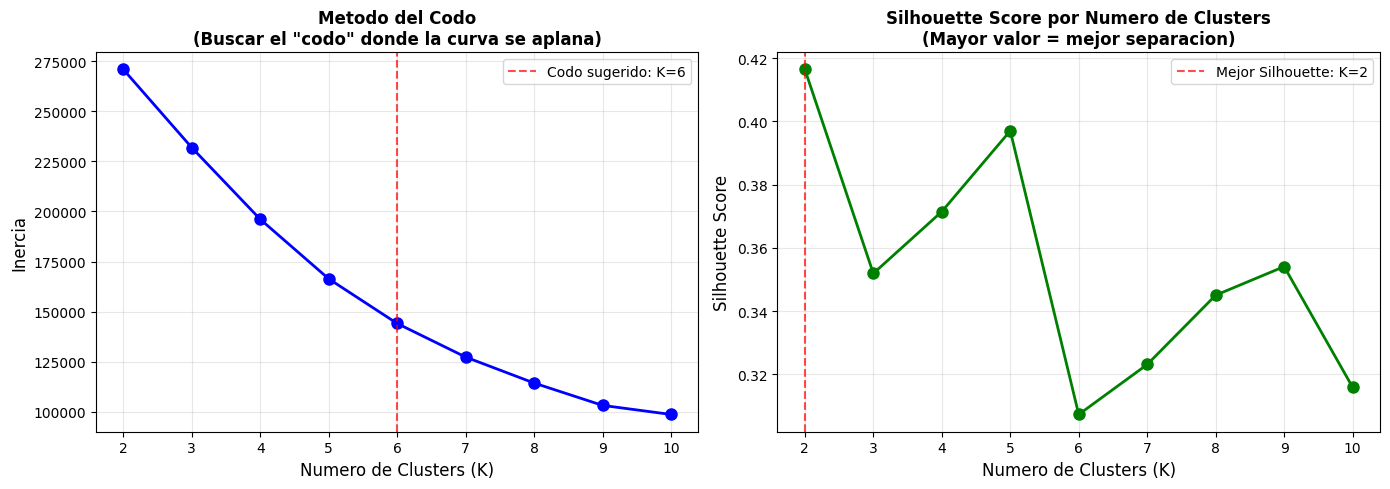


RESUMEN - SELECCION DE K
Segun el metodo del codo: K = 6
Segun Silhouette Score: K = 2 (score = 0.4165)

Recomendacion: Usar K = 2 clusters


In [30]:
# Metodo del Codo (Elbow Method) para determinar el numero optimo de clusters
# Evalua la inercia (suma de distancias al cuadrado dentro de los clusters)

print("=" * 80)
print("METODO DEL CODO - DETERMINACION DEL NUMERO OPTIMO DE CLUSTERS")
print("=" * 80)

# Rango de K a evaluar
k_range = range(2, 11)
inertias = []
silhouette_scores = []

print("\nCalculando metricas para diferentes valores de K...")
print("-" * 50)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10, max_iter=300)
    kmeans.fit(data_scaled)
    inertias.append(kmeans.inertia_)
    
    # Calcular silhouette score
    sil_score = silhouette_score(data_scaled, kmeans.labels_, sample_size=10000)
    silhouette_scores.append(sil_score)
    
    print(f"K = {k}: Inercia = {kmeans.inertia_:,.0f}, Silhouette = {sil_score:.4f}")

# Grafico del metodo del codo
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Grafico de Inercia (Metodo del Codo)
axes[0].plot(k_range, inertias, 'bo-', linewidth=2, markersize=8)
axes[0].set_xlabel('Numero de Clusters (K)', fontsize=12)
axes[0].set_ylabel('Inercia', fontsize=12)
axes[0].set_title('Metodo del Codo\n(Buscar el "codo" donde la curva se aplana)', fontsize=12, fontweight='bold')
axes[0].set_xticks(list(k_range))
axes[0].grid(True, alpha=0.3)

# Marcar el punto de inflexion (codo) - aproximacion visual
# Calculamos la segunda derivada para encontrar el codo
inertias_diff = np.diff(inertias)
inertias_diff2 = np.diff(inertias_diff)
elbow_idx = np.argmax(inertias_diff2) + 2  # +2 porque perdemos 2 puntos con las diferencias
k_optimo_codo = list(k_range)[elbow_idx]

axes[0].axvline(x=k_optimo_codo, color='red', linestyle='--', alpha=0.7, 
                label=f'Codo sugerido: K={k_optimo_codo}')
axes[0].legend()

# Grafico de Silhouette Score
axes[1].plot(k_range, silhouette_scores, 'go-', linewidth=2, markersize=8)
axes[1].set_xlabel('Numero de Clusters (K)', fontsize=12)
axes[1].set_ylabel('Silhouette Score', fontsize=12)
axes[1].set_title('Silhouette Score por Numero de Clusters\n(Mayor valor = mejor separacion)', fontsize=12, fontweight='bold')
axes[1].set_xticks(list(k_range))
axes[1].grid(True, alpha=0.3)

# Marcar el K con mejor silhouette
k_optimo_silhouette = list(k_range)[np.argmax(silhouette_scores)]
axes[1].axvline(x=k_optimo_silhouette, color='red', linestyle='--', alpha=0.7,
                label=f'Mejor Silhouette: K={k_optimo_silhouette}')
axes[1].legend()

plt.tight_layout()
plt.show()

# Resumen de resultados
print("\n" + "=" * 50)
print("RESUMEN - SELECCION DE K")
print("=" * 50)
print(f"Segun el metodo del codo: K = {k_optimo_codo}")
print(f"Segun Silhouette Score: K = {k_optimo_silhouette} (score = {max(silhouette_scores):.4f})")
print(f"\nRecomendacion: Usar K = {k_optimo_silhouette} clusters")

APLICACION DE K-MEANS CON K = 2 CLUSTERS

Modelo K-Means entrenado exitosamente
Numero de clusters: 2
Inercia final: 271,017

Distribucion de casos por cluster:
----------------------------------------
Cluster 0:   42,168 casos ( 84.3%)
Cluster 1:    7,832 casos ( 15.7%)


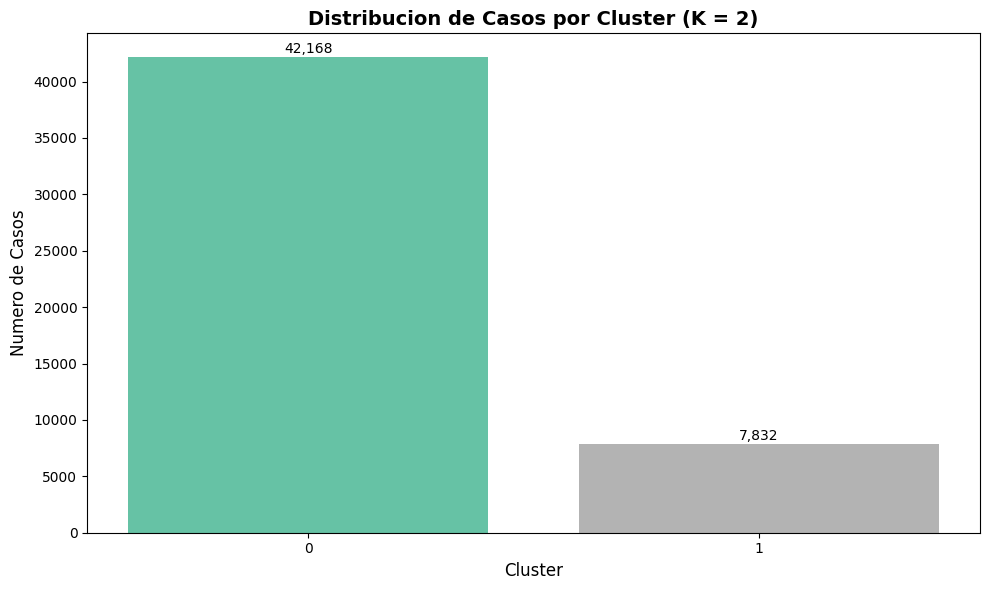

In [31]:
# Aplicacion de K-Means con el K optimo seleccionado
# Usar el K con mejor silhouette score

print("=" * 80)
print(f"APLICACION DE K-MEANS CON K = {k_optimo_silhouette} CLUSTERS")
print("=" * 80)

# Entrenar modelo final
kmeans_final = KMeans(n_clusters=k_optimo_silhouette, random_state=42, n_init=10, max_iter=300)
clusters = kmeans_final.fit_predict(data_scaled)

# Agregar etiquetas de cluster al dataframe
data_cluster_sample['Cluster'] = clusters

print(f"\nModelo K-Means entrenado exitosamente")
print(f"Numero de clusters: {k_optimo_silhouette}")
print(f"Inercia final: {kmeans_final.inertia_:,.0f}")

# Distribucion de casos por cluster
print("\nDistribucion de casos por cluster:")
print("-" * 40)
cluster_counts = data_cluster_sample['Cluster'].value_counts().sort_index()
for cluster, count in cluster_counts.items():
    pct = count / len(data_cluster_sample) * 100
    print(f"Cluster {cluster}: {count:>8,} casos ({pct:>5.1f}%)")

# Visualizacion de la distribucion de clusters
fig, ax = plt.subplots(figsize=(10, 6))
colors = plt.cm.Set2(np.linspace(0, 1, k_optimo_silhouette))
bars = ax.bar(cluster_counts.index, cluster_counts.values, color=colors)
ax.set_xlabel('Cluster', fontsize=12)
ax.set_ylabel('Numero de Casos', fontsize=12)
ax.set_title(f'Distribucion de Casos por Cluster (K = {k_optimo_silhouette})', fontsize=14, fontweight='bold')
ax.set_xticks(range(k_optimo_silhouette))

# Agregar etiquetas en las barras
for bar, count in zip(bars, cluster_counts.values):
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 100, 
            f'{count:,}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

In [32]:
# Caracterizacion e Interpretacion de cada Cluster
# Analizar las caracteristicas predominantes en cada grupo

print("=" * 80)
print("CARACTERIZACION DE LOS CLUSTERS")
print("=" * 80)

# Diccionarios de etiquetas para interpretacion
etiquetas_sexo = {1: 'Hombre', 2: 'Mujer'}
etiquetas_relacion = {
    1: 'Conyuge/Conviviente', 2: 'Ex conyuge', 3: 'Padre/Madre',
    4: 'Padrastro/Madrastra', 5: 'Hijo/Hija', 6: 'Hermano/Hermana',
    7: 'Abuelo/Abuela', 8: 'Otro familiar', 9: 'Otro'
}
etiquetas_estado_civil = {
    1: 'Soltero/a', 2: 'Casado/a', 3: 'Unido/a', 4: 'Separado/a',
    5: 'Divorciado/a', 6: 'Viudo/a', 9: 'Ignorado'
}

# Estadisticas por cluster
print("\nPERFIL DE CADA CLUSTER:")
print("=" * 80)

for cluster in range(k_optimo_silhouette):
    cluster_data = data_cluster_sample[data_cluster_sample['Cluster'] == cluster]
    n = len(cluster_data)
    
    print(f"\n{'='*40}")
    print(f"CLUSTER {cluster} ({n:,} casos - {n/len(data_cluster_sample)*100:.1f}%)")
    print(f"{'='*40}")
    
    # Edad promedio
    if 'VIC_EDAD' in cluster_data.columns:
        edad_media = cluster_data['VIC_EDAD'].mean()
        edad_mediana = cluster_data['VIC_EDAD'].median()
        print(f"\nEdad de victimas: Media = {edad_media:.1f}, Mediana = {edad_mediana:.0f}")
    
    # Sexo de la victima predominante
    if 'VIC_SEXO' in cluster_data.columns:
        sexo_mode = cluster_data['VIC_SEXO'].mode().iloc[0] if len(cluster_data['VIC_SEXO'].mode()) > 0 else None
        if sexo_mode:
            sexo_pct = (cluster_data['VIC_SEXO'] == sexo_mode).sum() / n * 100
            print(f"Sexo victima predominante: {etiquetas_sexo.get(sexo_mode, sexo_mode)} ({sexo_pct:.1f}%)")
    
    # Sexo del agresor predominante
    if 'AGR_SEXO' in cluster_data.columns:
        agr_mode = cluster_data['AGR_SEXO'].mode().iloc[0] if len(cluster_data['AGR_SEXO'].mode()) > 0 else None
        if agr_mode:
            agr_pct = (cluster_data['AGR_SEXO'] == agr_mode).sum() / n * 100
            print(f"Sexo agresor predominante: {etiquetas_sexo.get(agr_mode, agr_mode)} ({agr_pct:.1f}%)")
    
    # Relacion victima-agresor predominante
    if 'VIC_REL_AGR' in cluster_data.columns:
        rel_mode = cluster_data['VIC_REL_AGR'].mode().iloc[0] if len(cluster_data['VIC_REL_AGR'].mode()) > 0 else None
        if rel_mode:
            rel_pct = (cluster_data['VIC_REL_AGR'] == rel_mode).sum() / n * 100
            print(f"Relacion predominante: {etiquetas_relacion.get(rel_mode, f'Codigo {rel_mode}')} ({rel_pct:.1f}%)")
    
    # Estado civil predominante
    if 'VIC_EST_CIV' in cluster_data.columns:
        est_mode = cluster_data['VIC_EST_CIV'].mode().iloc[0] if len(cluster_data['VIC_EST_CIV'].mode()) > 0 else None
        if est_mode:
            est_pct = (cluster_data['VIC_EST_CIV'] == est_mode).sum() / n * 100
            print(f"Estado civil predominante: {etiquetas_estado_civil.get(est_mode, f'Codigo {est_mode}')} ({est_pct:.1f}%)")

CARACTERIZACION DE LOS CLUSTERS

PERFIL DE CADA CLUSTER:

CLUSTER 0 (42,168 casos - 84.3%)

Edad de victimas: Media = 32.5, Mediana = 30
Sexo victima predominante: Mujer (100.0%)
Sexo agresor predominante: Hombre (100.0%)
Relacion predominante: Conyuge/Conviviente (36.8%)
Estado civil predominante: Casado/a (43.0%)

CLUSTER 1 (7,832 casos - 15.7%)

Edad de victimas: Media = 39.8, Mediana = 36
Sexo victima predominante: Hombre (65.9%)
Sexo agresor predominante: Mujer (79.4%)
Relacion predominante: Codigo 10.0 (27.2%)
Estado civil predominante: Casado/a (43.7%)


VISUALIZACION DE PERFILES DE CLUSTERS


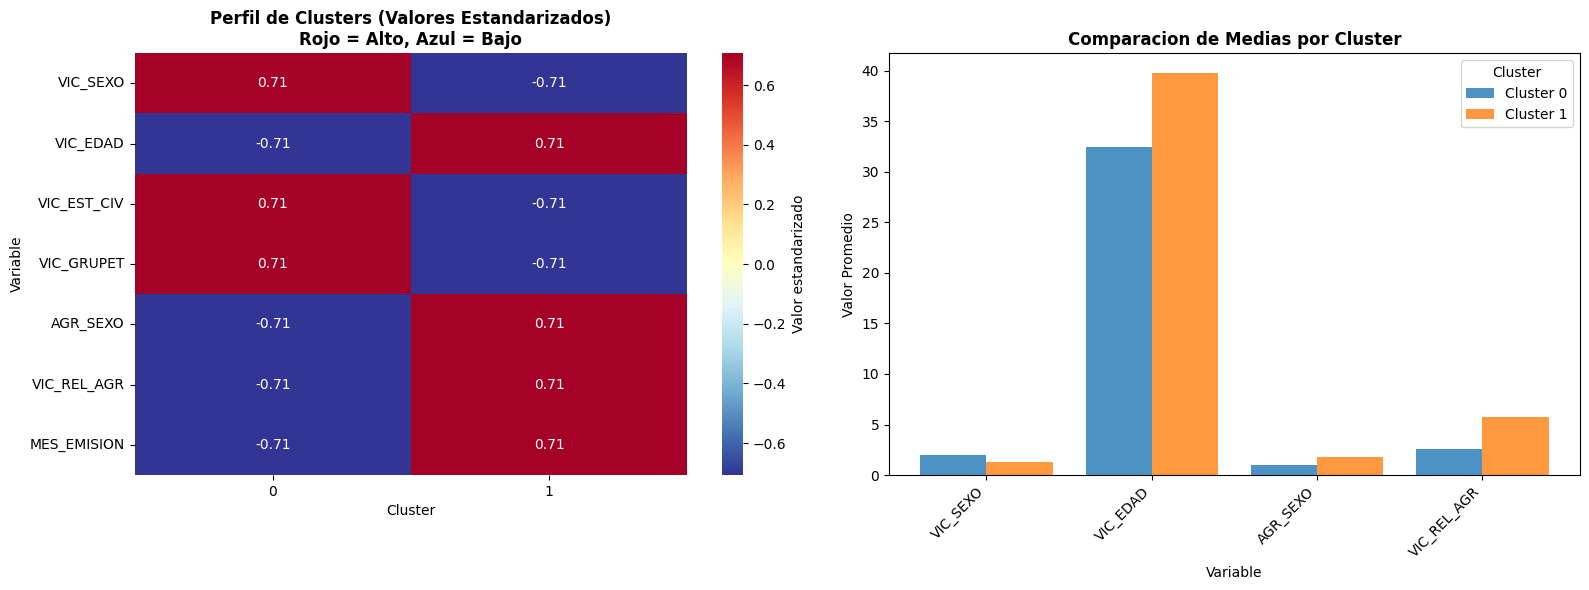


TABLA RESUMEN - MEDIAS POR CLUSTER:
--------------------------------------------------------------------------------
         VIC_SEXO  VIC_EDAD  VIC_EST_CIV  VIC_GRUPET  AGR_SEXO  VIC_REL_AGR  MES_EMISION
Cluster                                                                                 
0            2.00     32.50         2.98        2.01      1.00         2.62          6.4
1            1.34     39.75         2.56        1.95      1.79         5.77          6.4


In [33]:
# Visualizacion grafica de los perfiles de clusters
# Comparar las caracteristicas promedio de cada cluster

print("=" * 80)
print("VISUALIZACION DE PERFILES DE CLUSTERS")
print("=" * 80)

# Calcular medias por cluster para cada variable
cluster_means = data_cluster_sample.groupby('Cluster')[vars_disponibles].mean()

# Crear heatmap de caracteristicas por cluster
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Heatmap de medias estandarizadas
cluster_means_scaled = (cluster_means - cluster_means.mean()) / cluster_means.std()

sns.heatmap(cluster_means_scaled.T, annot=True, fmt='.2f', cmap='RdYlBu_r', 
            center=0, ax=axes[0], cbar_kws={'label': 'Valor estandarizado'})
axes[0].set_title('Perfil de Clusters (Valores Estandarizados)\nRojo = Alto, Azul = Bajo', 
                  fontsize=12, fontweight='bold')
axes[0].set_xlabel('Cluster')
axes[0].set_ylabel('Variable')

# Grafico de radar/spider para comparar clusters
# Simplificado como grafico de barras agrupadas

# Seleccionar variables clave para visualizacion
vars_viz = ['VIC_SEXO', 'VIC_EDAD', 'AGR_SEXO', 'VIC_REL_AGR']
vars_viz = [v for v in vars_viz if v in cluster_means.columns]

x = np.arange(len(vars_viz))
width = 0.8 / k_optimo_silhouette

for i in range(k_optimo_silhouette):
    valores = cluster_means.loc[i, vars_viz].values
    # Normalizar para visualizacion
    valores_norm = (valores - valores.min()) / (valores.max() - valores.min() + 0.001)
    axes[1].bar(x + i * width, cluster_means.loc[i, vars_viz], width, 
                label=f'Cluster {i}', alpha=0.8)

axes[1].set_xlabel('Variable')
axes[1].set_ylabel('Valor Promedio')
axes[1].set_title('Comparacion de Medias por Cluster', fontsize=12, fontweight='bold')
axes[1].set_xticks(x + width * (k_optimo_silhouette - 1) / 2)
axes[1].set_xticklabels(vars_viz, rotation=45, ha='right')
axes[1].legend(title='Cluster')

plt.tight_layout()
plt.show()

# Tabla resumen
print("\nTABLA RESUMEN - MEDIAS POR CLUSTER:")
print("-" * 80)
print(cluster_means.round(2).to_string())

## Resumen e Interpretacion del Clustering

### Metodologia aplicada:
1. **Preparacion de datos**: Se seleccionaron variables relevantes (sexo de victima y agresor, edad, estado civil, grupo etnico, relacion victima-agresor, mes de emision) y se estandarizaron para que todas tengan la misma escala.

2. **Seleccion del numero de clusters**: Se utilizo el **Metodo del Codo** (Elbow Method) evaluando la inercia para K de 2 a 10, complementado con el **Silhouette Score** para validar la calidad de la separacion entre clusters.

3. **Aplicacion de K-Means**: Se aplico el algoritmo K-Means con el K optimo identificado.

### Interpretacion de los clusters:

Los clusters identificados representan **perfiles tipicos de casos de violencia intrafamiliar** en Guatemala. Cada cluster agrupa casos con caracteristicas similares en terminos de:

- **Perfil demografico de la victima**: edad, sexo, estado civil, grupo etnico
- **Perfil del agresor**: sexo predominante
- **Dinamica relacional**: tipo de relacion entre victima y agresor

### Utilidad del clustering:

- **Focalizacion de intervenciones**: Permite diseñar programas de prevencion especificos para cada perfil de riesgo
- **Comprension de patrones**: Revela tipologias de violencia intrafamiliar que pueden no ser evidentes en analisis univariados
- **Priorizacion de recursos**: Ayuda a identificar grupos de mayor vulnerabilidad para asignar recursos de atencion

### Limitaciones:

- Los clusters son sensibles a las variables seleccionadas
- K-Means asume clusters esfericos de tamaño similar
- Las variables categoricas codificadas numericamente pueden afectar la interpretacion de distancias